# Project 2 Notebook # 


### Part 1: Training Model with SGD  ### 

In [6]:
import autograd.numpy as ag_np
import numpy as np
import pandas as pd
import os

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline


# %pip install autograd 

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

from CollabFilterOneVectorPerItem import CollabFilterOneVectorPerItem
from train_valid_test_loader import load_train_valid_test_datasets

DATA_DIR = './data_movie_lens_100k'
 

In [11]:
train_tuple, valid_tuple, test_tuple, n_users, n_items = load_train_valid_test_datasets()

# Hyperparameters
n_epochs = 25
batch_size = 64
step_size = 0.1
k_vals = [2, 10, 50]
alpha = 0.0  # No regularization

all_results = []
best_results = []

for k in k_vals:
    print(f"\nTraining model with k = {k}, alpha = {alpha}")
    model = CollabFilterOneVectorPerItem(
        n_epochs=n_epochs,
        batch_size=batch_size,
        step_size=step_size,
        n_factors=k,
        alpha=alpha,
    )
    model.init_parameter_dict(n_users, n_items, train_tuple)

    best_mae_valid = float('inf')
    best_epoch = 0
    best_params = None

    for epoch in range(n_epochs):
        # Train the model for one epoch
        model.fit(train_tuple, valid_tuple)

        # Validation metrics
        user_id_valid, item_id_valid, y_valid = valid_tuple
        y_pred_valid = model.predict(user_id_valid, item_id_valid)
#         mse_valid = ag_np.mean((y_pred_valid - y_valid) ** 2)
        mae_valid = ag_np.mean(ag_np.abs(y_pred_valid - y_valid))
        params = model.param_dict.copy()
        
#         use mae instead of mae
        if mae_valid < best_mae_valid:
            best_mae_valid = mae_valid
            best_epoch = epoch
            best_params = params

        print(f"Epoch {epoch + 1}/{n_epochs} - Validation MSE: {mse_valid:.4f}")
        
        all_results.append({        
            "k": k,
            "alpha": alpha,
            "mae_valid": mae_valid,
            "epoch": epoch})
        
        print("ALL RESULTS: ", all_results)

    # Load the best parameters
    model.param_dict = best_params

    # Compute final MAE metrics
    user_id_test, item_id_test, y_test = test_tuple
    y_pred_test = model.predict(user_id_test, item_id_test)
    mae_test = ag_np.mean(ag_np.abs(y_pred_test - y_test))

    mae_valid = ag_np.mean(ag_np.abs(model.predict(user_id_valid, item_id_valid) - y_valid))
    
    # Save best results
    best_results.append({
        "k": k,
        "alpha": alpha,
        "mae_valid": mae_valid,
        "mae_test": mae_test,
        "best_epoch": best_epoch,
        "params": best_params
    })

    print(f"Results for k={k}, alpha={alpha}:")
    print(f"  Best epoch: {best_epoch}")
    print(f"  Validation MAE: {mae_valid:.4f}")
    print(f"  Test MAE: {mae_test:.4f}")

# Final results summary
for res in best_results:
    print(f"k={res['k']}, Validation MAE={res['mae_valid']:.4f}, Test MAE={res['mae_test']:.4f}")



Training model with k = 2, alpha = 0.0
epoch       0.000 | loss_total     0.19604 | train_MAE     3.53059 | valid_MAE     3.54504 | grad_wrt_mu     0.10498 | grad_wrt_b_per_user     0.00011 | grad_wrt_c_per_item     0.00006 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.001 | loss_total     0.20176 | train_MAE     3.52005 | valid_MAE     3.53450 | grad_wrt_mu     0.10660 | grad_wrt_b_per_user     0.00011 | grad_wrt_c_per_item     0.00006 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.002 | loss_total     0.20743 | train_MAE     3.50935 | valid_MAE     3.52380 | grad_wrt_mu     0.10725 | grad_wrt_b_per_user     0.00011 | grad_wrt_c_per_item     0.00006 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.003 | loss_total     0.22660 | train_MAE     3.49859 | valid_MAE     3.51304 | grad_wrt_mu     0.11277 | grad_wrt_b_per_user     0.00012 | grad_wrt_c_per_item     0.00007 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.125 | 

epoch      12.000 | loss_total     0.01883 | train_MAE     0.92004 | valid_MAE     0.92235 | grad_wrt_mu     0.00013 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      13.000 | loss_total     0.01876 | train_MAE     0.91759 | valid_MAE     0.92000 | grad_wrt_mu     0.00548 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      14.000 | loss_total     0.01868 | train_MAE     0.91511 | valid_MAE     0.91764 | grad_wrt_mu     0.00609 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      15.000 | loss_total     0.01861 | train_MAE     0.91365 | valid_MAE     0.91636 | grad_wrt_mu     0.00205 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      16.000 | loss_total     0.01855 | train_MAE     0

epoch       3.000 | loss_total     0.01784 | train_MAE     0.89240 | valid_MAE     0.89699 | grad_wrt_mu     0.00133 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       3.500 | loss_total     0.01789 | train_MAE     0.89185 | valid_MAE     0.89653 | grad_wrt_mu     0.00297 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       4.000 | loss_total     0.01779 | train_MAE     0.89050 | valid_MAE     0.89519 | grad_wrt_mu     0.00007 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       4.500 | loss_total     0.01770 | train_MAE     0.89029 | valid_MAE     0.89508 | grad_wrt_mu     0.00032 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       5.000 | loss_total     0.01775 | train_MAE     0

epoch       0.500 | loss_total     0.01934 | train_MAE     0.86150 | valid_MAE     0.86852 | grad_wrt_mu     0.00461 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.625 | loss_total     0.01966 | train_MAE     0.86107 | valid_MAE     0.86807 | grad_wrt_mu     0.00143 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.751 | loss_total     0.01676 | train_MAE     0.86035 | valid_MAE     0.86732 | grad_wrt_mu     0.00968 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.876 | loss_total     0.01636 | train_MAE     0.86032 | valid_MAE     0.86731 | grad_wrt_mu     0.00443 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.000 | loss_total     0.01679 | train_MAE     0

epoch      19.000 | loss_total     0.01636 | train_MAE     0.84126 | valid_MAE     0.84963 | grad_wrt_mu     0.00090 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      20.000 | loss_total     0.01633 | train_MAE     0.84000 | valid_MAE     0.84840 | grad_wrt_mu     0.00129 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      21.000 | loss_total     0.01630 | train_MAE     0.83900 | valid_MAE     0.84747 | grad_wrt_mu     0.00091 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      22.000 | loss_total     0.01628 | train_MAE     0.83783 | valid_MAE     0.84634 | grad_wrt_mu     0.00070 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      23.000 | loss_total     0.01625 | train_MAE     0

epoch       6.000 | loss_total     0.01607 | train_MAE     0.82999 | valid_MAE     0.83907 | grad_wrt_mu     0.00854 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       6.500 | loss_total     0.01607 | train_MAE     0.82956 | valid_MAE     0.83868 | grad_wrt_mu     0.00700 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       7.000 | loss_total     0.01605 | train_MAE     0.82943 | valid_MAE     0.83860 | grad_wrt_mu     0.00058 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       7.500 | loss_total     0.01594 | train_MAE     0.82878 | valid_MAE     0.83796 | grad_wrt_mu     0.00273 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       8.000 | loss_total     0.01603 | train_MAE     0

epoch       1.251 | loss_total     0.01214 | train_MAE     0.81530 | valid_MAE     0.82553 | grad_wrt_mu     0.00262 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.376 | loss_total     0.01502 | train_MAE     0.81528 | valid_MAE     0.82552 | grad_wrt_mu     0.00129 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.500 | loss_total     0.01740 | train_MAE     0.81546 | valid_MAE     0.82575 | grad_wrt_mu     0.00172 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.625 | loss_total     0.01846 | train_MAE     0.81552 | valid_MAE     0.82582 | grad_wrt_mu     0.00352 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.751 | loss_total     0.01888 | train_MAE     0

epoch      24.999 | loss_total     0.01535 | train_MAE     0.80213 | valid_MAE     0.81337 | grad_wrt_mu     0.00220 | grad_wrt_b_per_user     0.00004 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
Epoch 5/25 - Validation MSE: 1.1578
ALL RESULTS:  [{'k': 2, 'alpha': 0.0, 'mae_valid': 0.9008051680601037, 'epoch': 0}, {'k': 2, 'alpha': 0.0, 'mae_valid': 0.8683620052373315, 'epoch': 1}, {'k': 2, 'alpha': 0.0, 'mae_valid': 0.8446346182456719, 'epoch': 2}, {'k': 2, 'alpha': 0.0, 'mae_valid': 0.8264956443634125, 'epoch': 3}, {'k': 2, 'alpha': 0.0, 'mae_valid': 0.813396015212506, 'epoch': 4}]
epoch       0.000 | loss_total     0.01907 | train_MAE     0.80215 | valid_MAE     0.81340 | grad_wrt_mu     0.00234 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.001 | loss_total     0.01561 | train_MAE     0.80217 | valid_MAE     0.81342 | grad_wrt_mu     0.00106 | grad_wrt_b_per_u

epoch      10.000 | loss_total     0.01523 | train_MAE     0.79757 | valid_MAE     0.80922 | grad_wrt_mu     0.00079 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      11.000 | loss_total     0.01522 | train_MAE     0.79693 | valid_MAE     0.80858 | grad_wrt_mu     0.00501 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      12.000 | loss_total     0.01520 | train_MAE     0.79754 | valid_MAE     0.80938 | grad_wrt_mu     0.00103 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      13.000 | loss_total     0.01519 | train_MAE     0.79660 | valid_MAE     0.80840 | grad_wrt_mu     0.00019 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      14.000 | loss_total     0.01518 | train_MAE     0

epoch       1.751 | loss_total     0.01384 | train_MAE     0.79105 | valid_MAE     0.80338 | grad_wrt_mu     0.00789 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.876 | loss_total     0.01654 | train_MAE     0.79100 | valid_MAE     0.80333 | grad_wrt_mu     0.00042 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       2.000 | loss_total     0.01619 | train_MAE     0.79090 | valid_MAE     0.80323 | grad_wrt_mu     0.00054 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       2.500 | loss_total     0.01508 | train_MAE     0.79060 | valid_MAE     0.80293 | grad_wrt_mu     0.00080 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       3.000 | loss_total     0.01503 | train_MAE     0

epoch       0.251 | loss_total     0.01282 | train_MAE     0.78358 | valid_MAE     0.79684 | grad_wrt_mu     0.00147 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.376 | loss_total     0.01990 | train_MAE     0.78301 | valid_MAE     0.79620 | grad_wrt_mu     0.00419 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.500 | loss_total     0.01193 | train_MAE     0.78343 | valid_MAE     0.79670 | grad_wrt_mu     0.00392 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.625 | loss_total     0.01191 | train_MAE     0.78310 | valid_MAE     0.79632 | grad_wrt_mu     0.00352 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.751 | loss_total     0.01472 | train_MAE     0

epoch      17.000 | loss_total     0.01471 | train_MAE     0.77860 | valid_MAE     0.79237 | grad_wrt_mu     0.00092 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      18.000 | loss_total     0.01471 | train_MAE     0.77836 | valid_MAE     0.79217 | grad_wrt_mu     0.00213 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      19.000 | loss_total     0.01470 | train_MAE     0.77846 | valid_MAE     0.79235 | grad_wrt_mu     0.00266 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      20.000 | loss_total     0.01469 | train_MAE     0.77803 | valid_MAE     0.79193 | grad_wrt_mu     0.00130 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      21.000 | loss_total     0.01468 | train_MAE     0

epoch       4.500 | loss_total     0.01463 | train_MAE     0.77540 | valid_MAE     0.78954 | grad_wrt_mu     0.00174 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       5.000 | loss_total     0.01462 | train_MAE     0.77586 | valid_MAE     0.79011 | grad_wrt_mu     0.00043 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       5.500 | loss_total     0.01458 | train_MAE     0.77575 | valid_MAE     0.79002 | grad_wrt_mu     0.00310 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       6.000 | loss_total     0.01462 | train_MAE     0.77571 | valid_MAE     0.79001 | grad_wrt_mu     0.00043 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       6.500 | loss_total     0.01465 | train_MAE     0

epoch       0.751 | loss_total     0.01808 | train_MAE     0.77103 | valid_MAE     0.78582 | grad_wrt_mu     0.00191 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.876 | loss_total     0.01277 | train_MAE     0.77116 | valid_MAE     0.78598 | grad_wrt_mu     0.00292 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.000 | loss_total     0.01638 | train_MAE     0.77142 | valid_MAE     0.78629 | grad_wrt_mu     0.00357 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.125 | loss_total     0.01383 | train_MAE     0.77148 | valid_MAE     0.78636 | grad_wrt_mu     0.00303 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.251 | loss_total     0.01521 | train_MAE     0

epoch      21.000 | loss_total     0.01440 | train_MAE     0.76726 | valid_MAE     0.78257 | grad_wrt_mu     0.00694 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      22.000 | loss_total     0.01439 | train_MAE     0.76697 | valid_MAE     0.78229 | grad_wrt_mu     0.00066 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      23.000 | loss_total     0.01440 | train_MAE     0.76721 | valid_MAE     0.78264 | grad_wrt_mu     0.00338 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      24.000 | loss_total     0.01438 | train_MAE     0.76756 | valid_MAE     0.78310 | grad_wrt_mu     0.00372 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      24.999 | loss_total     0.01438 | train_MAE     0

epoch       6.000 | loss_total     0.01435 | train_MAE     0.76642 | valid_MAE     0.78215 | grad_wrt_mu     0.00687 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       6.500 | loss_total     0.01447 | train_MAE     0.76575 | valid_MAE     0.78139 | grad_wrt_mu     0.00156 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       7.000 | loss_total     0.01435 | train_MAE     0.76586 | valid_MAE     0.78155 | grad_wrt_mu     0.00097 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       7.500 | loss_total     0.01429 | train_MAE     0.76548 | valid_MAE     0.78112 | grad_wrt_mu     0.00959 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       8.000 | loss_total     0.01435 | train_MAE     0

epoch       1.000 | loss_total     0.02043 | train_MAE     0.76361 | valid_MAE     0.77988 | grad_wrt_mu     0.00230 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.125 | loss_total     0.01049 | train_MAE     0.76306 | valid_MAE     0.77923 | grad_wrt_mu     0.00466 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.251 | loss_total     0.01822 | train_MAE     0.76290 | valid_MAE     0.77904 | grad_wrt_mu     0.00061 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.376 | loss_total     0.01655 | train_MAE     0.76309 | valid_MAE     0.77929 | grad_wrt_mu     0.00043 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.500 | loss_total     0.01359 | train_MAE     0

epoch      23.000 | loss_total     0.01419 | train_MAE     0.75991 | valid_MAE     0.77653 | grad_wrt_mu     0.00473 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      24.000 | loss_total     0.01418 | train_MAE     0.76000 | valid_MAE     0.77670 | grad_wrt_mu     0.00358 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      24.999 | loss_total     0.01417 | train_MAE     0.75962 | valid_MAE     0.77627 | grad_wrt_mu     0.00204 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
Epoch 12/25 - Validation MSE: 1.1578
ALL RESULTS:  [{'k': 2, 'alpha': 0.0, 'mae_valid': 0.9008051680601037, 'epoch': 0}, {'k': 2, 'alpha': 0.0, 'mae_valid': 0.8683620052373315, 'epoch': 1}, {'k': 2, 'alpha': 0.0, 'mae_valid': 0.8446346182456719, 'epoch': 2}, {'k': 2, 'alpha': 0.0, 'mae_valid': 

epoch       7.000 | loss_total     0.01415 | train_MAE     0.75908 | valid_MAE     0.77595 | grad_wrt_mu     0.00028 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       7.500 | loss_total     0.01421 | train_MAE     0.75878 | valid_MAE     0.77560 | grad_wrt_mu     0.00329 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       8.000 | loss_total     0.01415 | train_MAE     0.75900 | valid_MAE     0.77591 | grad_wrt_mu     0.01000 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       9.000 | loss_total     0.01414 | train_MAE     0.75847 | valid_MAE     0.77531 | grad_wrt_mu     0.00452 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      10.000 | loss_total     0.01414 | train_MAE     0

epoch       1.000 | loss_total     0.01414 | train_MAE     0.75670 | valid_MAE     0.77392 | grad_wrt_mu     0.00315 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.125 | loss_total     0.01615 | train_MAE     0.75648 | valid_MAE     0.77365 | grad_wrt_mu     0.00570 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.251 | loss_total     0.01412 | train_MAE     0.75662 | valid_MAE     0.77383 | grad_wrt_mu     0.00060 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.376 | loss_total     0.01289 | train_MAE     0.75660 | valid_MAE     0.77381 | grad_wrt_mu     0.00362 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.500 | loss_total     0.01090 | train_MAE     0

epoch      23.000 | loss_total     0.01402 | train_MAE     0.75462 | valid_MAE     0.77233 | grad_wrt_mu     0.00271 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      24.000 | loss_total     0.01403 | train_MAE     0.75445 | valid_MAE     0.77217 | grad_wrt_mu     0.00120 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      24.999 | loss_total     0.01402 | train_MAE     0.75450 | valid_MAE     0.77227 | grad_wrt_mu     0.00454 | grad_wrt_b_per_user     0.00004 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
Epoch 14/25 - Validation MSE: 1.1578
ALL RESULTS:  [{'k': 2, 'alpha': 0.0, 'mae_valid': 0.9008051680601037, 'epoch': 0}, {'k': 2, 'alpha': 0.0, 'mae_valid': 0.8683620052373315, 'epoch': 1}, {'k': 2, 'alpha': 0.0, 'mae_valid': 0.8446346182456719, 'epoch': 2}, {'k': 2, 'alpha': 0.0, 'mae_valid': 

epoch       6.500 | loss_total     0.01387 | train_MAE     0.75357 | valid_MAE     0.77140 | grad_wrt_mu     0.00081 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       7.000 | loss_total     0.01399 | train_MAE     0.75411 | valid_MAE     0.77209 | grad_wrt_mu     0.00717 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       7.500 | loss_total     0.01410 | train_MAE     0.75416 | valid_MAE     0.77218 | grad_wrt_mu     0.00014 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       8.000 | loss_total     0.01400 | train_MAE     0.75347 | valid_MAE     0.77134 | grad_wrt_mu     0.00226 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       9.000 | loss_total     0.01399 | train_MAE     0

epoch       0.876 | loss_total     0.01241 | train_MAE     0.75230 | valid_MAE     0.77062 | grad_wrt_mu     0.00813 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.000 | loss_total     0.01342 | train_MAE     0.75215 | valid_MAE     0.77043 | grad_wrt_mu     0.00072 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.125 | loss_total     0.01158 | train_MAE     0.75168 | valid_MAE     0.76985 | grad_wrt_mu     0.00096 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.251 | loss_total     0.01404 | train_MAE     0.75207 | valid_MAE     0.77035 | grad_wrt_mu     0.00709 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.376 | loss_total     0.01439 | train_MAE     0

epoch      22.000 | loss_total     0.01390 | train_MAE     0.75062 | valid_MAE     0.76934 | grad_wrt_mu     0.00272 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      23.000 | loss_total     0.01390 | train_MAE     0.75059 | valid_MAE     0.76934 | grad_wrt_mu     0.00246 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      24.000 | loss_total     0.01390 | train_MAE     0.75057 | valid_MAE     0.76936 | grad_wrt_mu     0.00306 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      24.999 | loss_total     0.01389 | train_MAE     0.75009 | valid_MAE     0.76877 | grad_wrt_mu     0.00536 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
Epoch 16/25 - Validation MSE: 1.1578
ALL RESULTS:  [{'k': 2,

epoch       5.500 | loss_total     0.01390 | train_MAE     0.74969 | valid_MAE     0.76848 | grad_wrt_mu     0.00004 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       6.000 | loss_total     0.01388 | train_MAE     0.74999 | valid_MAE     0.76888 | grad_wrt_mu     0.00148 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       6.500 | loss_total     0.01393 | train_MAE     0.75034 | valid_MAE     0.76934 | grad_wrt_mu     0.00518 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       7.000 | loss_total     0.01388 | train_MAE     0.74947 | valid_MAE     0.76824 | grad_wrt_mu     0.00585 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       7.500 | loss_total     0.01387 | train_MAE     0

epoch       0.500 | loss_total     0.01373 | train_MAE     0.74841 | valid_MAE     0.76756 | grad_wrt_mu     0.00431 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.625 | loss_total     0.01005 | train_MAE     0.74857 | valid_MAE     0.76777 | grad_wrt_mu     0.00273 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.751 | loss_total     0.01915 | train_MAE     0.74848 | valid_MAE     0.76766 | grad_wrt_mu     0.00017 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.876 | loss_total     0.00778 | train_MAE     0.74843 | valid_MAE     0.76760 | grad_wrt_mu     0.00173 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.000 | loss_total     0.01534 | train_MAE     0

epoch      19.000 | loss_total     0.01380 | train_MAE     0.74754 | valid_MAE     0.76707 | grad_wrt_mu     0.00144 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      20.000 | loss_total     0.01380 | train_MAE     0.74742 | valid_MAE     0.76695 | grad_wrt_mu     0.00827 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      21.000 | loss_total     0.01380 | train_MAE     0.74741 | valid_MAE     0.76697 | grad_wrt_mu     0.00077 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      22.000 | loss_total     0.01379 | train_MAE     0.74716 | valid_MAE     0.76669 | grad_wrt_mu     0.00098 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      23.000 | loss_total     0.01379 | train_MAE     0

epoch       4.000 | loss_total     0.01378 | train_MAE     0.74646 | valid_MAE     0.76603 | grad_wrt_mu     0.00121 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       4.500 | loss_total     0.01380 | train_MAE     0.74668 | valid_MAE     0.76631 | grad_wrt_mu     0.00075 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       5.000 | loss_total     0.01378 | train_MAE     0.74645 | valid_MAE     0.76605 | grad_wrt_mu     0.00088 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       5.500 | loss_total     0.01367 | train_MAE     0.74620 | valid_MAE     0.76575 | grad_wrt_mu     0.00210 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       6.000 | loss_total     0.01378 | train_MAE     0

epoch       0.125 | loss_total     0.01183 | train_MAE     0.74540 | valid_MAE     0.76534 | grad_wrt_mu     0.00147 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.251 | loss_total     0.01376 | train_MAE     0.74527 | valid_MAE     0.76517 | grad_wrt_mu     0.00328 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.376 | loss_total     0.01240 | train_MAE     0.74547 | valid_MAE     0.76542 | grad_wrt_mu     0.00108 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.500 | loss_total     0.01753 | train_MAE     0.74588 | valid_MAE     0.76593 | grad_wrt_mu     0.00577 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.625 | loss_total     0.01730 | train_MAE     0

epoch      16.000 | loss_total     0.01372 | train_MAE     0.74459 | valid_MAE     0.76477 | grad_wrt_mu     0.00150 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      17.000 | loss_total     0.01372 | train_MAE     0.74432 | valid_MAE     0.76446 | grad_wrt_mu     0.00107 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      18.000 | loss_total     0.01371 | train_MAE     0.74428 | valid_MAE     0.76443 | grad_wrt_mu     0.00499 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      19.000 | loss_total     0.01371 | train_MAE     0.74487 | valid_MAE     0.76519 | grad_wrt_mu     0.00019 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      20.000 | loss_total     0.01371 | train_MAE     0

epoch       2.500 | loss_total     0.01363 | train_MAE     0.74414 | valid_MAE     0.76452 | grad_wrt_mu     0.00159 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       3.000 | loss_total     0.01370 | train_MAE     0.74384 | valid_MAE     0.76416 | grad_wrt_mu     0.00426 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       3.500 | loss_total     0.01375 | train_MAE     0.74390 | valid_MAE     0.76425 | grad_wrt_mu     0.00582 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       4.000 | loss_total     0.01370 | train_MAE     0.74413 | valid_MAE     0.76454 | grad_wrt_mu     0.00031 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       4.500 | loss_total     0.01376 | train_MAE     0

epoch       0.125 | loss_total     0.01355 | train_MAE     0.74238 | valid_MAE     0.76290 | grad_wrt_mu     0.00581 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.251 | loss_total     0.01851 | train_MAE     0.74251 | valid_MAE     0.76307 | grad_wrt_mu     0.00854 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.376 | loss_total     0.01402 | train_MAE     0.74312 | valid_MAE     0.76383 | grad_wrt_mu     0.00447 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.500 | loss_total     0.01151 | train_MAE     0.74304 | valid_MAE     0.76373 | grad_wrt_mu     0.00791 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.625 | loss_total     0.01348 | train_MAE     0

epoch      16.000 | loss_total     0.01364 | train_MAE     0.74251 | valid_MAE     0.76345 | grad_wrt_mu     0.00181 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      17.000 | loss_total     0.01364 | train_MAE     0.74187 | valid_MAE     0.76267 | grad_wrt_mu     0.00472 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      18.000 | loss_total     0.01363 | train_MAE     0.74217 | valid_MAE     0.76307 | grad_wrt_mu     0.00087 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      19.000 | loss_total     0.01364 | train_MAE     0.74219 | valid_MAE     0.76312 | grad_wrt_mu     0.00462 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      20.000 | loss_total     0.01364 | train_MAE     0

epoch       2.500 | loss_total     0.01364 | train_MAE     0.74121 | valid_MAE     0.76210 | grad_wrt_mu     0.00456 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       3.000 | loss_total     0.01362 | train_MAE     0.74153 | valid_MAE     0.76251 | grad_wrt_mu     0.00687 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       3.500 | loss_total     0.01358 | train_MAE     0.74154 | valid_MAE     0.76252 | grad_wrt_mu     0.00136 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       4.000 | loss_total     0.01363 | train_MAE     0.74208 | valid_MAE     0.76322 | grad_wrt_mu     0.00372 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       4.500 | loss_total     0.01357 | train_MAE     0

epoch       0.125 | loss_total     0.01482 | train_MAE     0.74074 | valid_MAE     0.76202 | grad_wrt_mu     0.00429 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.251 | loss_total     0.00949 | train_MAE     0.74047 | valid_MAE     0.76169 | grad_wrt_mu     0.00047 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.376 | loss_total     0.01082 | train_MAE     0.74054 | valid_MAE     0.76177 | grad_wrt_mu     0.00604 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.500 | loss_total     0.01458 | train_MAE     0.74063 | valid_MAE     0.76190 | grad_wrt_mu     0.00575 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.625 | loss_total     0.00976 | train_MAE     0

epoch      16.000 | loss_total     0.01358 | train_MAE     0.73987 | valid_MAE     0.76128 | grad_wrt_mu     0.00110 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      17.000 | loss_total     0.01358 | train_MAE     0.73998 | valid_MAE     0.76143 | grad_wrt_mu     0.00057 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      18.000 | loss_total     0.01358 | train_MAE     0.74027 | valid_MAE     0.76183 | grad_wrt_mu     0.00385 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      19.000 | loss_total     0.01358 | train_MAE     0.73990 | valid_MAE     0.76138 | grad_wrt_mu     0.00069 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      20.000 | loss_total     0.01357 | train_MAE     0

epoch       2.000 | loss_total     0.01488 | train_MAE     0.73926 | valid_MAE     0.76075 | grad_wrt_mu     0.00307 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       2.500 | loss_total     0.01355 | train_MAE     0.73956 | valid_MAE     0.76114 | grad_wrt_mu     0.00095 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       3.000 | loss_total     0.01356 | train_MAE     0.73958 | valid_MAE     0.76117 | grad_wrt_mu     0.00191 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       3.500 | loss_total     0.01353 | train_MAE     0.73964 | valid_MAE     0.76125 | grad_wrt_mu     0.00191 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       4.000 | loss_total     0.01356 | train_MAE     0

epoch       0.125 | loss_total     0.10747 | train_MAE     2.32472 | valid_MAE     2.33789 | grad_wrt_mu     0.07422 | grad_wrt_b_per_user     0.00008 | grad_wrt_c_per_item     0.00004 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.251 | loss_total     0.05066 | train_MAE     1.63168 | valid_MAE     1.64046 | grad_wrt_mu     0.04683 | grad_wrt_b_per_user     0.00005 | grad_wrt_c_per_item     0.00003 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.376 | loss_total     0.03693 | train_MAE     1.29577 | valid_MAE     1.30281 | grad_wrt_mu     0.03268 | grad_wrt_b_per_user     0.00004 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.500 | loss_total     0.02958 | train_MAE     1.07296 | valid_MAE     1.07884 | grad_wrt_mu     0.02054 | grad_wrt_b_per_user     0.00004 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.625 | loss_total     0.02240 | train_MAE     0

epoch      16.000 | loss_total     0.01855 | train_MAE     0.91232 | valid_MAE     0.91522 | grad_wrt_mu     0.00249 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      17.000 | loss_total     0.01848 | train_MAE     0.91015 | valid_MAE     0.91317 | grad_wrt_mu     0.00284 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      18.000 | loss_total     0.01841 | train_MAE     0.90916 | valid_MAE     0.91241 | grad_wrt_mu     0.00298 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      19.000 | loss_total     0.01836 | train_MAE     0.90648 | valid_MAE     0.90979 | grad_wrt_mu     0.00282 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      20.000 | loss_total     0.01829 | train_MAE     0

epoch       1.751 | loss_total     0.01879 | train_MAE     0.89374 | valid_MAE     0.89811 | grad_wrt_mu     0.00116 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.876 | loss_total     0.01805 | train_MAE     0.89404 | valid_MAE     0.89847 | grad_wrt_mu     0.00328 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       2.000 | loss_total     0.01982 | train_MAE     0.89397 | valid_MAE     0.89843 | grad_wrt_mu     0.00011 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       2.500 | loss_total     0.01787 | train_MAE     0.89347 | valid_MAE     0.89801 | grad_wrt_mu     0.00037 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       3.000 | loss_total     0.01785 | train_MAE     0

epoch       0.125 | loss_total     0.01930 | train_MAE     0.86139 | valid_MAE     0.86831 | grad_wrt_mu     0.00078 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.251 | loss_total     0.01639 | train_MAE     0.86147 | valid_MAE     0.86842 | grad_wrt_mu     0.00243 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.376 | loss_total     0.01755 | train_MAE     0.86138 | valid_MAE     0.86835 | grad_wrt_mu     0.00172 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.500 | loss_total     0.02031 | train_MAE     0.86113 | valid_MAE     0.86810 | grad_wrt_mu     0.00303 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.625 | loss_total     0.01163 | train_MAE     0

epoch      16.000 | loss_total     0.01644 | train_MAE     0.84403 | valid_MAE     0.85218 | grad_wrt_mu     0.00693 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      17.000 | loss_total     0.01640 | train_MAE     0.84246 | valid_MAE     0.85063 | grad_wrt_mu     0.00494 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      18.000 | loss_total     0.01638 | train_MAE     0.84193 | valid_MAE     0.85020 | grad_wrt_mu     0.00302 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      19.000 | loss_total     0.01635 | train_MAE     0.84051 | valid_MAE     0.84881 | grad_wrt_mu     0.00578 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      20.000 | loss_total     0.01633 | train_MAE     0

epoch       1.751 | loss_total     0.01969 | train_MAE     0.83389 | valid_MAE     0.84271 | grad_wrt_mu     0.00077 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.876 | loss_total     0.01998 | train_MAE     0.83337 | valid_MAE     0.84217 | grad_wrt_mu     0.00314 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       2.000 | loss_total     0.01277 | train_MAE     0.83310 | valid_MAE     0.84190 | grad_wrt_mu     0.00383 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       2.500 | loss_total     0.01609 | train_MAE     0.83253 | valid_MAE     0.84134 | grad_wrt_mu     0.00185 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       3.000 | loss_total     0.01614 | train_MAE     0

epoch       0.125 | loss_total     0.01286 | train_MAE     0.81684 | valid_MAE     0.82710 | grad_wrt_mu     0.00212 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.251 | loss_total     0.01090 | train_MAE     0.81697 | valid_MAE     0.82726 | grad_wrt_mu     0.00192 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.376 | loss_total     0.01788 | train_MAE     0.81674 | valid_MAE     0.82703 | grad_wrt_mu     0.00249 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.500 | loss_total     0.01388 | train_MAE     0.81619 | valid_MAE     0.82643 | grad_wrt_mu     0.00601 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.625 | loss_total     0.02065 | train_MAE     0

epoch      16.000 | loss_total     0.01547 | train_MAE     0.80698 | valid_MAE     0.81790 | grad_wrt_mu     0.00224 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      17.000 | loss_total     0.01545 | train_MAE     0.80620 | valid_MAE     0.81713 | grad_wrt_mu     0.00183 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      18.000 | loss_total     0.01544 | train_MAE     0.80604 | valid_MAE     0.81705 | grad_wrt_mu     0.00095 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      19.000 | loss_total     0.01542 | train_MAE     0.80435 | valid_MAE     0.81525 | grad_wrt_mu     0.00767 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      20.000 | loss_total     0.01541 | train_MAE     0

epoch       1.625 | loss_total     0.01634 | train_MAE     0.80125 | valid_MAE     0.81255 | grad_wrt_mu     0.00269 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.751 | loss_total     0.01818 | train_MAE     0.80123 | valid_MAE     0.81254 | grad_wrt_mu     0.00204 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.876 | loss_total     0.01300 | train_MAE     0.80170 | valid_MAE     0.81309 | grad_wrt_mu     0.00344 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       2.000 | loss_total     0.01521 | train_MAE     0.80123 | valid_MAE     0.81257 | grad_wrt_mu     0.00291 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       2.500 | loss_total     0.01530 | train_MAE     0

epoch       0.125 | loss_total     0.01609 | train_MAE     0.79153 | valid_MAE     0.80377 | grad_wrt_mu     0.00205 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.251 | loss_total     0.01554 | train_MAE     0.79182 | valid_MAE     0.80412 | grad_wrt_mu     0.00318 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.376 | loss_total     0.01314 | train_MAE     0.79224 | valid_MAE     0.80461 | grad_wrt_mu     0.00029 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.500 | loss_total     0.02022 | train_MAE     0.79188 | valid_MAE     0.80421 | grad_wrt_mu     0.00871 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.625 | loss_total     0.01663 | train_MAE     0

epoch      16.000 | loss_total     0.01492 | train_MAE     0.78625 | valid_MAE     0.79915 | grad_wrt_mu     0.00183 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      17.000 | loss_total     0.01491 | train_MAE     0.78608 | valid_MAE     0.79903 | grad_wrt_mu     0.00657 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      18.000 | loss_total     0.01490 | train_MAE     0.78582 | valid_MAE     0.79882 | grad_wrt_mu     0.00320 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      19.000 | loss_total     0.01489 | train_MAE     0.78535 | valid_MAE     0.79836 | grad_wrt_mu     0.00594 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      20.000 | loss_total     0.01488 | train_MAE     0

epoch       1.625 | loss_total     0.01327 | train_MAE     0.78301 | valid_MAE     0.79630 | grad_wrt_mu     0.00331 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.751 | loss_total     0.01535 | train_MAE     0.78228 | valid_MAE     0.79546 | grad_wrt_mu     0.00471 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.876 | loss_total     0.01460 | train_MAE     0.78257 | valid_MAE     0.79581 | grad_wrt_mu     0.00662 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       2.000 | loss_total     0.01309 | train_MAE     0.78273 | valid_MAE     0.79601 | grad_wrt_mu     0.00068 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       2.500 | loss_total     0.01474 | train_MAE     0

epoch       0.125 | loss_total     0.01087 | train_MAE     0.77653 | valid_MAE     0.79055 | grad_wrt_mu     0.00214 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.251 | loss_total     0.01507 | train_MAE     0.77662 | valid_MAE     0.79066 | grad_wrt_mu     0.00126 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.376 | loss_total     0.02124 | train_MAE     0.77666 | valid_MAE     0.79072 | grad_wrt_mu     0.01015 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.500 | loss_total     0.01500 | train_MAE     0.77648 | valid_MAE     0.79052 | grad_wrt_mu     0.00098 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.625 | loss_total     0.01438 | train_MAE     0

epoch      16.000 | loss_total     0.01456 | train_MAE     0.77340 | valid_MAE     0.78798 | grad_wrt_mu     0.00707 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      17.000 | loss_total     0.01455 | train_MAE     0.77352 | valid_MAE     0.78818 | grad_wrt_mu     0.00049 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      18.000 | loss_total     0.01455 | train_MAE     0.77299 | valid_MAE     0.78763 | grad_wrt_mu     0.00328 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      19.000 | loss_total     0.01454 | train_MAE     0.77291 | valid_MAE     0.78760 | grad_wrt_mu     0.00563 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      20.000 | loss_total     0.01453 | train_MAE     0

epoch       1.500 | loss_total     0.01843 | train_MAE     0.77116 | valid_MAE     0.78602 | grad_wrt_mu     0.00009 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.625 | loss_total     0.01174 | train_MAE     0.77149 | valid_MAE     0.78641 | grad_wrt_mu     0.00322 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.751 | loss_total     0.01618 | train_MAE     0.77137 | valid_MAE     0.78627 | grad_wrt_mu     0.00112 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.876 | loss_total     0.01325 | train_MAE     0.77111 | valid_MAE     0.78598 | grad_wrt_mu     0.00275 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       2.000 | loss_total     0.01603 | train_MAE     0

epoch       0.125 | loss_total     0.01261 | train_MAE     0.76671 | valid_MAE     0.78215 | grad_wrt_mu     0.00424 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.251 | loss_total     0.01430 | train_MAE     0.76659 | valid_MAE     0.78203 | grad_wrt_mu     0.00169 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.376 | loss_total     0.01990 | train_MAE     0.76656 | valid_MAE     0.78200 | grad_wrt_mu     0.01170 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.500 | loss_total     0.01506 | train_MAE     0.76687 | valid_MAE     0.78237 | grad_wrt_mu     0.00108 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.625 | loss_total     0.01575 | train_MAE     0

epoch      16.000 | loss_total     0.01431 | train_MAE     0.76437 | valid_MAE     0.78026 | grad_wrt_mu     0.00201 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      17.000 | loss_total     0.01431 | train_MAE     0.76444 | valid_MAE     0.78040 | grad_wrt_mu     0.00433 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      18.000 | loss_total     0.01430 | train_MAE     0.76396 | valid_MAE     0.77988 | grad_wrt_mu     0.00686 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      19.000 | loss_total     0.01430 | train_MAE     0.76426 | valid_MAE     0.78029 | grad_wrt_mu     0.00170 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      20.000 | loss_total     0.01429 | train_MAE     0

epoch       1.376 | loss_total     0.01516 | train_MAE     0.76284 | valid_MAE     0.77898 | grad_wrt_mu     0.00041 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.500 | loss_total     0.01251 | train_MAE     0.76294 | valid_MAE     0.77911 | grad_wrt_mu     0.00581 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.625 | loss_total     0.01406 | train_MAE     0.76304 | valid_MAE     0.77924 | grad_wrt_mu     0.00321 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.751 | loss_total     0.01248 | train_MAE     0.76294 | valid_MAE     0.77913 | grad_wrt_mu     0.00038 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.876 | loss_total     0.00939 | train_MAE     0

epoch       0.125 | loss_total     0.01491 | train_MAE     0.75964 | valid_MAE     0.77630 | grad_wrt_mu     0.00230 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.251 | loss_total     0.01449 | train_MAE     0.75954 | valid_MAE     0.77618 | grad_wrt_mu     0.00306 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.376 | loss_total     0.01296 | train_MAE     0.75959 | valid_MAE     0.77626 | grad_wrt_mu     0.00059 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.500 | loss_total     0.01613 | train_MAE     0.75968 | valid_MAE     0.77637 | grad_wrt_mu     0.00380 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.625 | loss_total     0.01823 | train_MAE     0

epoch      16.000 | loss_total     0.01411 | train_MAE     0.75782 | valid_MAE     0.77484 | grad_wrt_mu     0.00061 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      17.000 | loss_total     0.01412 | train_MAE     0.75846 | valid_MAE     0.77568 | grad_wrt_mu     0.00352 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      18.000 | loss_total     0.01411 | train_MAE     0.75773 | valid_MAE     0.77482 | grad_wrt_mu     0.00014 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      19.000 | loss_total     0.01411 | train_MAE     0.75750 | valid_MAE     0.77458 | grad_wrt_mu     0.00357 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      20.000 | loss_total     0.01412 | train_MAE     0

epoch       1.376 | loss_total     0.01337 | train_MAE     0.75690 | valid_MAE     0.77419 | grad_wrt_mu     0.00578 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.500 | loss_total     0.00890 | train_MAE     0.75728 | valid_MAE     0.77467 | grad_wrt_mu     0.00074 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.625 | loss_total     0.01628 | train_MAE     0.75718 | valid_MAE     0.77455 | grad_wrt_mu     0.00053 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.751 | loss_total     0.00953 | train_MAE     0.75683 | valid_MAE     0.77412 | grad_wrt_mu     0.00323 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.876 | loss_total     0.01337 | train_MAE     0

epoch       0.125 | loss_total     0.01263 | train_MAE     0.75454 | valid_MAE     0.77232 | grad_wrt_mu     0.00166 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.251 | loss_total     0.01539 | train_MAE     0.75427 | valid_MAE     0.77200 | grad_wrt_mu     0.00867 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.376 | loss_total     0.01689 | train_MAE     0.75393 | valid_MAE     0.77158 | grad_wrt_mu     0.00185 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.500 | loss_total     0.01677 | train_MAE     0.75416 | valid_MAE     0.77187 | grad_wrt_mu     0.00096 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.625 | loss_total     0.01375 | train_MAE     0

epoch      16.000 | loss_total     0.01397 | train_MAE     0.75322 | valid_MAE     0.77137 | grad_wrt_mu     0.00072 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      17.000 | loss_total     0.01398 | train_MAE     0.75300 | valid_MAE     0.77113 | grad_wrt_mu     0.00253 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      18.000 | loss_total     0.01397 | train_MAE     0.75283 | valid_MAE     0.77097 | grad_wrt_mu     0.00589 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      19.000 | loss_total     0.01397 | train_MAE     0.75264 | valid_MAE     0.77077 | grad_wrt_mu     0.00133 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      20.000 | loss_total     0.01396 | train_MAE     0

epoch       1.251 | loss_total     0.01283 | train_MAE     0.75247 | valid_MAE     0.77084 | grad_wrt_mu     0.00064 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.376 | loss_total     0.01445 | train_MAE     0.75226 | valid_MAE     0.77058 | grad_wrt_mu     0.00121 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.500 | loss_total     0.00831 | train_MAE     0.75214 | valid_MAE     0.77044 | grad_wrt_mu     0.00647 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.625 | loss_total     0.01366 | train_MAE     0.75193 | valid_MAE     0.77019 | grad_wrt_mu     0.00081 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.751 | loss_total     0.01498 | train_MAE     0

epoch      24.999 | loss_total     0.01389 | train_MAE     0.75027 | valid_MAE     0.76900 | grad_wrt_mu     0.00409 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
Epoch 16/25 - Validation MSE: 1.1578
ALL RESULTS:  [{'k': 2, 'alpha': 0.0, 'mae_valid': 0.9008051680601037, 'epoch': 0}, {'k': 2, 'alpha': 0.0, 'mae_valid': 0.8683620052373315, 'epoch': 1}, {'k': 2, 'alpha': 0.0, 'mae_valid': 0.8446346182456719, 'epoch': 2}, {'k': 2, 'alpha': 0.0, 'mae_valid': 0.8264956443634125, 'epoch': 3}, {'k': 2, 'alpha': 0.0, 'mae_valid': 0.813396015212506, 'epoch': 4}, {'k': 2, 'alpha': 0.0, 'mae_valid': 0.8038196207978204, 'epoch': 5}, {'k': 2, 'alpha': 0.0, 'mae_valid': 0.7967661119191236, 'epoch': 6}, {'k': 2, 'alpha': 0.0, 'mae_valid': 0.7905062708907091, 'epoch': 7}, {'k': 2, 'alpha': 0.0, 'mae_valid': 0.786199277312832, 'epoch': 8}, {'k': 2, 'alpha': 0.0, 'mae_valid': 0.7828533499532465, 'epoch': 9}, {'k': 2, 'alpha': 0.0, 'm

epoch       3.500 | loss_total     0.01384 | train_MAE     0.75000 | valid_MAE     0.76880 | grad_wrt_mu     0.00420 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       4.000 | loss_total     0.01389 | train_MAE     0.74995 | valid_MAE     0.76875 | grad_wrt_mu     0.00464 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       4.500 | loss_total     0.01389 | train_MAE     0.74971 | valid_MAE     0.76847 | grad_wrt_mu     0.00116 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       5.000 | loss_total     0.01388 | train_MAE     0.74991 | valid_MAE     0.76874 | grad_wrt_mu     0.00035 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       5.500 | loss_total     0.01391 | train_MAE     0

epoch       0.125 | loss_total     0.01135 | train_MAE     0.74855 | valid_MAE     0.76772 | grad_wrt_mu     0.00119 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.251 | loss_total     0.01379 | train_MAE     0.74840 | valid_MAE     0.76753 | grad_wrt_mu     0.00366 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.376 | loss_total     0.01537 | train_MAE     0.74853 | valid_MAE     0.76771 | grad_wrt_mu     0.00352 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.500 | loss_total     0.01093 | train_MAE     0.74865 | valid_MAE     0.76786 | grad_wrt_mu     0.00162 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.625 | loss_total     0.01337 | train_MAE     0

epoch      16.000 | loss_total     0.01381 | train_MAE     0.74745 | valid_MAE     0.76685 | grad_wrt_mu     0.00099 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      17.000 | loss_total     0.01381 | train_MAE     0.74784 | valid_MAE     0.76738 | grad_wrt_mu     0.00233 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      18.000 | loss_total     0.01380 | train_MAE     0.74689 | valid_MAE     0.76620 | grad_wrt_mu     0.00412 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      19.000 | loss_total     0.01380 | train_MAE     0.74751 | valid_MAE     0.76703 | grad_wrt_mu     0.00001 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      20.000 | loss_total     0.01379 | train_MAE     0

epoch       1.125 | loss_total     0.01508 | train_MAE     0.74678 | valid_MAE     0.76633 | grad_wrt_mu     0.00195 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.251 | loss_total     0.01310 | train_MAE     0.74702 | valid_MAE     0.76664 | grad_wrt_mu     0.00191 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.376 | loss_total     0.01294 | train_MAE     0.74660 | valid_MAE     0.76611 | grad_wrt_mu     0.00188 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.500 | loss_total     0.01078 | train_MAE     0.74625 | valid_MAE     0.76567 | grad_wrt_mu     0.00330 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.625 | loss_total     0.01500 | train_MAE     0

epoch      24.000 | loss_total     0.01375 | train_MAE     0.74560 | valid_MAE     0.76555 | grad_wrt_mu     0.00050 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      24.999 | loss_total     0.01375 | train_MAE     0.74547 | valid_MAE     0.76542 | grad_wrt_mu     0.00827 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
Epoch 19/25 - Validation MSE: 1.1578
ALL RESULTS:  [{'k': 2, 'alpha': 0.0, 'mae_valid': 0.9008051680601037, 'epoch': 0}, {'k': 2, 'alpha': 0.0, 'mae_valid': 0.8683620052373315, 'epoch': 1}, {'k': 2, 'alpha': 0.0, 'mae_valid': 0.8446346182456719, 'epoch': 2}, {'k': 2, 'alpha': 0.0, 'mae_valid': 0.8264956443634125, 'epoch': 3}, {'k': 2, 'alpha': 0.0, 'mae_valid': 0.813396015212506, 'epoch': 4}, {'k': 2, 'alpha': 0.0, 'mae_valid': 0.8038196207978204, 'epoch': 5}, {'k': 2, 'alpha': 0.0, 'mae_valid': 0.7967661119191236, 'epoch': 

epoch       2.500 | loss_total     0.01369 | train_MAE     0.74512 | valid_MAE     0.76505 | grad_wrt_mu     0.00495 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       3.000 | loss_total     0.01375 | train_MAE     0.74542 | valid_MAE     0.76544 | grad_wrt_mu     0.00778 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       3.500 | loss_total     0.01379 | train_MAE     0.74535 | valid_MAE     0.76536 | grad_wrt_mu     0.00370 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       4.000 | loss_total     0.01374 | train_MAE     0.74513 | valid_MAE     0.76510 | grad_wrt_mu     0.00310 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       4.500 | loss_total     0.01369 | train_MAE     0

epoch       0.125 | loss_total     0.01282 | train_MAE     0.74374 | valid_MAE     0.76395 | grad_wrt_mu     0.00159 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.251 | loss_total     0.01009 | train_MAE     0.74334 | valid_MAE     0.76345 | grad_wrt_mu     0.00101 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.376 | loss_total     0.01708 | train_MAE     0.74377 | valid_MAE     0.76400 | grad_wrt_mu     0.00017 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.500 | loss_total     0.01163 | train_MAE     0.74389 | valid_MAE     0.76415 | grad_wrt_mu     0.00275 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.625 | loss_total     0.01130 | train_MAE     0

epoch      16.000 | loss_total     0.01367 | train_MAE     0.74324 | valid_MAE     0.76374 | grad_wrt_mu     0.00219 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      17.000 | loss_total     0.01368 | train_MAE     0.74301 | valid_MAE     0.76348 | grad_wrt_mu     0.00020 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      18.000 | loss_total     0.01368 | train_MAE     0.74355 | valid_MAE     0.76417 | grad_wrt_mu     0.00255 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      19.000 | loss_total     0.01367 | train_MAE     0.74333 | valid_MAE     0.76392 | grad_wrt_mu     0.00703 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      20.000 | loss_total     0.01367 | train_MAE     0

epoch       1.000 | loss_total     0.01215 | train_MAE     0.74305 | valid_MAE     0.76375 | grad_wrt_mu     0.00516 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.125 | loss_total     0.01056 | train_MAE     0.74306 | valid_MAE     0.76377 | grad_wrt_mu     0.00369 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.251 | loss_total     0.01812 | train_MAE     0.74332 | valid_MAE     0.76409 | grad_wrt_mu     0.00316 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.376 | loss_total     0.01468 | train_MAE     0.74316 | valid_MAE     0.76389 | grad_wrt_mu     0.00923 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.500 | loss_total     0.01321 | train_MAE     0

epoch      23.000 | loss_total     0.01363 | train_MAE     0.74196 | valid_MAE     0.76292 | grad_wrt_mu     0.00409 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      24.000 | loss_total     0.01364 | train_MAE     0.74183 | valid_MAE     0.76278 | grad_wrt_mu     0.00307 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      24.999 | loss_total     0.01363 | train_MAE     0.74184 | valid_MAE     0.76283 | grad_wrt_mu     0.00351 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
Epoch 22/25 - Validation MSE: 1.1578
ALL RESULTS:  [{'k': 2, 'alpha': 0.0, 'mae_valid': 0.9008051680601037, 'epoch': 0}, {'k': 2, 'alpha': 0.0, 'mae_valid': 0.8683620052373315, 'epoch': 1}, {'k': 2, 'alpha': 0.0, 'mae_valid': 0.8446346182456719, 'epoch': 2}, {'k': 2, 'alpha': 0.0, 'mae_valid': 

epoch       1.876 | loss_total     0.01297 | train_MAE     0.74177 | valid_MAE     0.76277 | grad_wrt_mu     0.00047 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       2.000 | loss_total     0.01541 | train_MAE     0.74151 | valid_MAE     0.76245 | grad_wrt_mu     0.00820 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       2.500 | loss_total     0.01359 | train_MAE     0.74166 | valid_MAE     0.76267 | grad_wrt_mu     0.00041 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       3.000 | loss_total     0.01362 | train_MAE     0.74142 | valid_MAE     0.76236 | grad_wrt_mu     0.00184 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       3.500 | loss_total     0.01362 | train_MAE     0

epoch       0.125 | loss_total     0.01287 | train_MAE     0.74042 | valid_MAE     0.76162 | grad_wrt_mu     0.00041 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.251 | loss_total     0.01346 | train_MAE     0.74046 | valid_MAE     0.76167 | grad_wrt_mu     0.00473 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.376 | loss_total     0.01608 | train_MAE     0.74026 | valid_MAE     0.76143 | grad_wrt_mu     0.00664 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.500 | loss_total     0.01323 | train_MAE     0.74061 | valid_MAE     0.76187 | grad_wrt_mu     0.00040 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.625 | loss_total     0.01975 | train_MAE     0

epoch      16.000 | loss_total     0.01358 | train_MAE     0.73971 | valid_MAE     0.76108 | grad_wrt_mu     0.00366 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      17.000 | loss_total     0.01358 | train_MAE     0.74002 | valid_MAE     0.76149 | grad_wrt_mu     0.00212 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      18.000 | loss_total     0.01358 | train_MAE     0.74012 | valid_MAE     0.76163 | grad_wrt_mu     0.00176 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      19.000 | loss_total     0.01357 | train_MAE     0.73993 | valid_MAE     0.76141 | grad_wrt_mu     0.00296 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      20.000 | loss_total     0.01357 | train_MAE     0

epoch       1.000 | loss_total     0.01375 | train_MAE     0.73981 | valid_MAE     0.76141 | grad_wrt_mu     0.00166 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.125 | loss_total     0.01080 | train_MAE     0.73991 | valid_MAE     0.76153 | grad_wrt_mu     0.00276 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.251 | loss_total     0.01737 | train_MAE     0.73995 | valid_MAE     0.76159 | grad_wrt_mu     0.00530 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.376 | loss_total     0.01620 | train_MAE     0.73979 | valid_MAE     0.76139 | grad_wrt_mu     0.00450 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.500 | loss_total     0.01287 | train_MAE     0

epoch      23.000 | loss_total     0.01354 | train_MAE     0.73909 | valid_MAE     0.76097 | grad_wrt_mu     0.00376 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      24.000 | loss_total     0.01354 | train_MAE     0.73856 | valid_MAE     0.76033 | grad_wrt_mu     0.00200 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      24.999 | loss_total     0.01354 | train_MAE     0.73869 | valid_MAE     0.76051 | grad_wrt_mu     0.00284 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
Epoch 25/25 - Validation MSE: 1.1578
ALL RESULTS:  [{'k': 2, 'alpha': 0.0, 'mae_valid': 0.9008051680601037, 'epoch': 0}, {'k': 2, 'alpha': 0.0, 'mae_valid': 0.8683620052373315, 'epoch': 1}, {'k': 2, 'alpha': 0.0, 'mae_valid': 0.8446346182456719, 'epoch': 2}, {'k': 2, 'alpha': 0.0, 'mae_valid': 

epoch       1.751 | loss_total     0.02092 | train_MAE     0.94190 | valid_MAE     0.94256 | grad_wrt_mu     0.00443 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.876 | loss_total     0.01737 | train_MAE     0.94044 | valid_MAE     0.94101 | grad_wrt_mu     0.00203 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       2.000 | loss_total     0.01824 | train_MAE     0.94042 | valid_MAE     0.94103 | grad_wrt_mu     0.00259 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       2.500 | loss_total     0.01958 | train_MAE     0.93895 | valid_MAE     0.93962 | grad_wrt_mu     0.00198 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       3.000 | loss_total     0.01956 | train_MAE     0

epoch       0.125 | loss_total     0.02125 | train_MAE     0.89749 | valid_MAE     0.90175 | grad_wrt_mu     0.00201 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.251 | loss_total     0.02076 | train_MAE     0.89636 | valid_MAE     0.90056 | grad_wrt_mu     0.00236 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.376 | loss_total     0.01666 | train_MAE     0.89629 | valid_MAE     0.90052 | grad_wrt_mu     0.00217 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.500 | loss_total     0.01899 | train_MAE     0.89591 | valid_MAE     0.90015 | grad_wrt_mu     0.00161 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.625 | loss_total     0.01701 | train_MAE     0

epoch      16.000 | loss_total     0.01725 | train_MAE     0.87333 | valid_MAE     0.87940 | grad_wrt_mu     0.00741 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      17.000 | loss_total     0.01721 | train_MAE     0.87247 | valid_MAE     0.87869 | grad_wrt_mu     0.00462 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      18.000 | loss_total     0.01718 | train_MAE     0.87162 | valid_MAE     0.87798 | grad_wrt_mu     0.00330 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      19.000 | loss_total     0.01713 | train_MAE     0.87022 | valid_MAE     0.87668 | grad_wrt_mu     0.00213 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      20.000 | loss_total     0.01709 | train_MAE     0

epoch       0.876 | loss_total     0.01748 | train_MAE     0.86139 | valid_MAE     0.86847 | grad_wrt_mu     0.00411 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.000 | loss_total     0.01880 | train_MAE     0.86158 | valid_MAE     0.86871 | grad_wrt_mu     0.00331 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.125 | loss_total     0.01896 | train_MAE     0.86050 | valid_MAE     0.86755 | grad_wrt_mu     0.00884 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.251 | loss_total     0.01491 | train_MAE     0.85995 | valid_MAE     0.86698 | grad_wrt_mu     0.00094 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.376 | loss_total     0.01492 | train_MAE     0

epoch      22.000 | loss_total     0.01627 | train_MAE     0.83812 | valid_MAE     0.84666 | grad_wrt_mu     0.00002 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      23.000 | loss_total     0.01626 | train_MAE     0.83665 | valid_MAE     0.84521 | grad_wrt_mu     0.00347 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      24.000 | loss_total     0.01623 | train_MAE     0.83675 | valid_MAE     0.84544 | grad_wrt_mu     0.00689 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      24.999 | loss_total     0.01621 | train_MAE     0.83455 | valid_MAE     0.84321 | grad_wrt_mu     0.00080 | grad_wrt_b_per_user     0.00004 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
Epoch 3/25 - Validation MSE: 1.1578
ALL RESULTS:  [{'k': 2, 

epoch       1.500 | loss_total     0.01535 | train_MAE     0.83442 | valid_MAE     0.84326 | grad_wrt_mu     0.00573 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.625 | loss_total     0.02179 | train_MAE     0.83437 | valid_MAE     0.84322 | grad_wrt_mu     0.00356 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.751 | loss_total     0.02075 | train_MAE     0.83451 | valid_MAE     0.84339 | grad_wrt_mu     0.00366 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.876 | loss_total     0.01735 | train_MAE     0.83374 | valid_MAE     0.84257 | grad_wrt_mu     0.00007 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       2.000 | loss_total     0.01749 | train_MAE     0

epoch       0.125 | loss_total     0.01474 | train_MAE     0.81656 | valid_MAE     0.82680 | grad_wrt_mu     0.00284 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.251 | loss_total     0.01121 | train_MAE     0.81638 | valid_MAE     0.82661 | grad_wrt_mu     0.00167 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.376 | loss_total     0.01378 | train_MAE     0.81586 | valid_MAE     0.82606 | grad_wrt_mu     0.00534 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.500 | loss_total     0.01519 | train_MAE     0.81592 | valid_MAE     0.82614 | grad_wrt_mu     0.00343 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.625 | loss_total     0.01569 | train_MAE     0

epoch      16.000 | loss_total     0.01547 | train_MAE     0.80685 | valid_MAE     0.81776 | grad_wrt_mu     0.00802 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      17.000 | loss_total     0.01545 | train_MAE     0.80671 | valid_MAE     0.81771 | grad_wrt_mu     0.00122 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      18.000 | loss_total     0.01545 | train_MAE     0.80599 | valid_MAE     0.81700 | grad_wrt_mu     0.00079 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      19.000 | loss_total     0.01542 | train_MAE     0.80506 | valid_MAE     0.81606 | grad_wrt_mu     0.00338 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      20.000 | loss_total     0.01541 | train_MAE     0

epoch       0.751 | loss_total     0.00973 | train_MAE     0.80135 | valid_MAE     0.81258 | grad_wrt_mu     0.00811 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.876 | loss_total     0.01881 | train_MAE     0.80167 | valid_MAE     0.81295 | grad_wrt_mu     0.00270 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.000 | loss_total     0.01444 | train_MAE     0.80179 | valid_MAE     0.81310 | grad_wrt_mu     0.00224 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.125 | loss_total     0.01641 | train_MAE     0.80167 | valid_MAE     0.81298 | grad_wrt_mu     0.00094 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.251 | loss_total     0.01439 | train_MAE     0

epoch      21.000 | loss_total     0.01511 | train_MAE     0.79335 | valid_MAE     0.80548 | grad_wrt_mu     0.00282 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      22.000 | loss_total     0.01509 | train_MAE     0.79303 | valid_MAE     0.80521 | grad_wrt_mu     0.00227 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      23.000 | loss_total     0.01508 | train_MAE     0.79226 | valid_MAE     0.80441 | grad_wrt_mu     0.00096 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      24.000 | loss_total     0.01508 | train_MAE     0.79215 | valid_MAE     0.80439 | grad_wrt_mu     0.00218 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      24.999 | loss_total     0.01507 | train_MAE     0

epoch       1.251 | loss_total     0.01576 | train_MAE     0.79087 | valid_MAE     0.80313 | grad_wrt_mu     0.00179 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.376 | loss_total     0.00994 | train_MAE     0.79119 | valid_MAE     0.80350 | grad_wrt_mu     0.00293 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.500 | loss_total     0.01573 | train_MAE     0.79118 | valid_MAE     0.80351 | grad_wrt_mu     0.00409 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.625 | loss_total     0.01879 | train_MAE     0.79112 | valid_MAE     0.80344 | grad_wrt_mu     0.00214 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.751 | loss_total     0.01328 | train_MAE     0

epoch      24.999 | loss_total     0.01484 | train_MAE     0.78354 | valid_MAE     0.79678 | grad_wrt_mu     0.00413 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
Epoch 7/25 - Validation MSE: 1.1578
ALL RESULTS:  [{'k': 2, 'alpha': 0.0, 'mae_valid': 0.9008051680601037, 'epoch': 0}, {'k': 2, 'alpha': 0.0, 'mae_valid': 0.8683620052373315, 'epoch': 1}, {'k': 2, 'alpha': 0.0, 'mae_valid': 0.8446346182456719, 'epoch': 2}, {'k': 2, 'alpha': 0.0, 'mae_valid': 0.8264956443634125, 'epoch': 3}, {'k': 2, 'alpha': 0.0, 'mae_valid': 0.813396015212506, 'epoch': 4}, {'k': 2, 'alpha': 0.0, 'mae_valid': 0.8038196207978204, 'epoch': 5}, {'k': 2, 'alpha': 0.0, 'mae_valid': 0.7967661119191236, 'epoch': 6}, {'k': 2, 'alpha': 0.0, 'mae_valid': 0.7905062708907091, 'epoch': 7}, {'k': 2, 'alpha': 0.0, 'mae_valid': 0.786199277312832, 'epoch': 8}, {'k': 2, 'alpha': 0.0, 'mae_valid': 0.7828533499532465, 'epoch': 9}, {'k': 2, 'alpha': 0.0, 'ma

epoch       1.751 | loss_total     0.01426 | train_MAE     0.78303 | valid_MAE     0.79633 | grad_wrt_mu     0.00192 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.876 | loss_total     0.01826 | train_MAE     0.78304 | valid_MAE     0.79634 | grad_wrt_mu     0.00271 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       2.000 | loss_total     0.01554 | train_MAE     0.78258 | valid_MAE     0.79583 | grad_wrt_mu     0.00509 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       2.500 | loss_total     0.01484 | train_MAE     0.78262 | valid_MAE     0.79592 | grad_wrt_mu     0.00150 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       3.000 | loss_total     0.01482 | train_MAE     0

epoch       0.125 | loss_total     0.01350 | train_MAE     0.77662 | valid_MAE     0.79065 | grad_wrt_mu     0.00555 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.251 | loss_total     0.01514 | train_MAE     0.77672 | valid_MAE     0.79078 | grad_wrt_mu     0.00016 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.376 | loss_total     0.01388 | train_MAE     0.77629 | valid_MAE     0.79030 | grad_wrt_mu     0.00147 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.500 | loss_total     0.01956 | train_MAE     0.77725 | valid_MAE     0.79141 | grad_wrt_mu     0.00409 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.625 | loss_total     0.01036 | train_MAE     0

epoch      16.000 | loss_total     0.01457 | train_MAE     0.77307 | valid_MAE     0.78759 | grad_wrt_mu     0.00310 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      17.000 | loss_total     0.01455 | train_MAE     0.77336 | valid_MAE     0.78800 | grad_wrt_mu     0.00099 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      18.000 | loss_total     0.01455 | train_MAE     0.77311 | valid_MAE     0.78777 | grad_wrt_mu     0.00536 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      19.000 | loss_total     0.01454 | train_MAE     0.77299 | valid_MAE     0.78770 | grad_wrt_mu     0.00101 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      20.000 | loss_total     0.01454 | train_MAE     0

epoch       0.625 | loss_total     0.01135 | train_MAE     0.77172 | valid_MAE     0.78662 | grad_wrt_mu     0.00595 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.751 | loss_total     0.01282 | train_MAE     0.77142 | valid_MAE     0.78628 | grad_wrt_mu     0.00162 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.876 | loss_total     0.01411 | train_MAE     0.77140 | valid_MAE     0.78627 | grad_wrt_mu     0.00110 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.000 | loss_total     0.01133 | train_MAE     0.77173 | valid_MAE     0.78666 | grad_wrt_mu     0.00070 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.125 | loss_total     0.01631 | train_MAE     0

epoch      20.000 | loss_total     0.01440 | train_MAE     0.76779 | valid_MAE     0.78316 | grad_wrt_mu     0.00020 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      21.000 | loss_total     0.01440 | train_MAE     0.76770 | valid_MAE     0.78311 | grad_wrt_mu     0.00061 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      22.000 | loss_total     0.01439 | train_MAE     0.76709 | valid_MAE     0.78244 | grad_wrt_mu     0.00084 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      23.000 | loss_total     0.01439 | train_MAE     0.76692 | valid_MAE     0.78230 | grad_wrt_mu     0.00001 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      24.000 | loss_total     0.01438 | train_MAE     0

epoch       1.000 | loss_total     0.01084 | train_MAE     0.76697 | valid_MAE     0.78252 | grad_wrt_mu     0.00046 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.125 | loss_total     0.01854 | train_MAE     0.76687 | valid_MAE     0.78242 | grad_wrt_mu     0.00036 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.251 | loss_total     0.01173 | train_MAE     0.76679 | valid_MAE     0.78233 | grad_wrt_mu     0.00026 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.376 | loss_total     0.01270 | train_MAE     0.76696 | valid_MAE     0.78255 | grad_wrt_mu     0.00302 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.500 | loss_total     0.01936 | train_MAE     0

epoch      23.000 | loss_total     0.01428 | train_MAE     0.76368 | valid_MAE     0.77982 | grad_wrt_mu     0.00333 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      24.000 | loss_total     0.01428 | train_MAE     0.76343 | valid_MAE     0.77957 | grad_wrt_mu     0.00972 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      24.999 | loss_total     0.01427 | train_MAE     0.76293 | valid_MAE     0.77902 | grad_wrt_mu     0.00142 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
Epoch 11/25 - Validation MSE: 1.1578
ALL RESULTS:  [{'k': 2, 'alpha': 0.0, 'mae_valid': 0.9008051680601037, 'epoch': 0}, {'k': 2, 'alpha': 0.0, 'mae_valid': 0.8683620052373315, 'epoch': 1}, {'k': 2, 'alpha': 0.0, 'mae_valid': 0.8446346182456719, 'epoch': 2}, {'k': 2, 'alpha': 0.0, 'mae_valid': 

epoch       1.376 | loss_total     0.00873 | train_MAE     0.76369 | valid_MAE     0.78001 | grad_wrt_mu     0.00272 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.500 | loss_total     0.01222 | train_MAE     0.76300 | valid_MAE     0.77919 | grad_wrt_mu     0.00040 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.625 | loss_total     0.01413 | train_MAE     0.76266 | valid_MAE     0.77878 | grad_wrt_mu     0.00397 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.751 | loss_total     0.01427 | train_MAE     0.76229 | valid_MAE     0.77833 | grad_wrt_mu     0.00290 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.876 | loss_total     0.01481 | train_MAE     0

epoch       0.125 | loss_total     0.01296 | train_MAE     0.76011 | valid_MAE     0.77690 | grad_wrt_mu     0.00389 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.251 | loss_total     0.01308 | train_MAE     0.75977 | valid_MAE     0.77649 | grad_wrt_mu     0.00324 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.376 | loss_total     0.01289 | train_MAE     0.75957 | valid_MAE     0.77624 | grad_wrt_mu     0.00407 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.500 | loss_total     0.01468 | train_MAE     0.75977 | valid_MAE     0.77650 | grad_wrt_mu     0.00034 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.625 | loss_total     0.01641 | train_MAE     0

epoch      16.000 | loss_total     0.01412 | train_MAE     0.75765 | valid_MAE     0.77463 | grad_wrt_mu     0.00481 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      17.000 | loss_total     0.01412 | train_MAE     0.75819 | valid_MAE     0.77536 | grad_wrt_mu     0.00547 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      18.000 | loss_total     0.01411 | train_MAE     0.75797 | valid_MAE     0.77513 | grad_wrt_mu     0.00164 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      19.000 | loss_total     0.01411 | train_MAE     0.75780 | valid_MAE     0.77496 | grad_wrt_mu     0.00485 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      20.000 | loss_total     0.01411 | train_MAE     0

epoch       0.376 | loss_total     0.01606 | train_MAE     0.75730 | valid_MAE     0.77465 | grad_wrt_mu     0.00269 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.500 | loss_total     0.01340 | train_MAE     0.75709 | valid_MAE     0.77439 | grad_wrt_mu     0.00172 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.625 | loss_total     0.01199 | train_MAE     0.75680 | valid_MAE     0.77403 | grad_wrt_mu     0.00308 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.751 | loss_total     0.01347 | train_MAE     0.75709 | valid_MAE     0.77440 | grad_wrt_mu     0.00428 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.876 | loss_total     0.01474 | train_MAE     0

epoch      18.000 | loss_total     0.01404 | train_MAE     0.75520 | valid_MAE     0.77283 | grad_wrt_mu     0.00103 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      19.000 | loss_total     0.01403 | train_MAE     0.75505 | valid_MAE     0.77269 | grad_wrt_mu     0.00359 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      20.000 | loss_total     0.01403 | train_MAE     0.75503 | valid_MAE     0.77271 | grad_wrt_mu     0.00337 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      21.000 | loss_total     0.01403 | train_MAE     0.75473 | valid_MAE     0.77239 | grad_wrt_mu     0.00536 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      22.000 | loss_total     0.01402 | train_MAE     0

epoch       0.625 | loss_total     0.01230 | train_MAE     0.75440 | valid_MAE     0.77218 | grad_wrt_mu     0.00110 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.751 | loss_total     0.01414 | train_MAE     0.75431 | valid_MAE     0.77207 | grad_wrt_mu     0.00063 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.876 | loss_total     0.01199 | train_MAE     0.75450 | valid_MAE     0.77231 | grad_wrt_mu     0.00238 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.000 | loss_total     0.01086 | train_MAE     0.75474 | valid_MAE     0.77262 | grad_wrt_mu     0.00209 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.125 | loss_total     0.01387 | train_MAE     0

epoch      20.000 | loss_total     0.01396 | train_MAE     0.75266 | valid_MAE     0.77083 | grad_wrt_mu     0.00004 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      21.000 | loss_total     0.01396 | train_MAE     0.75223 | valid_MAE     0.77033 | grad_wrt_mu     0.00296 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      22.000 | loss_total     0.01395 | train_MAE     0.75244 | valid_MAE     0.77064 | grad_wrt_mu     0.00171 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      23.000 | loss_total     0.01396 | train_MAE     0.75261 | valid_MAE     0.77089 | grad_wrt_mu     0.00398 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      24.000 | loss_total     0.01395 | train_MAE     0

epoch       0.876 | loss_total     0.01312 | train_MAE     0.75208 | valid_MAE     0.77034 | grad_wrt_mu     0.00198 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.000 | loss_total     0.01823 | train_MAE     0.75236 | valid_MAE     0.77070 | grad_wrt_mu     0.00325 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.125 | loss_total     0.01511 | train_MAE     0.75244 | valid_MAE     0.77080 | grad_wrt_mu     0.00179 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.251 | loss_total     0.01974 | train_MAE     0.75215 | valid_MAE     0.77045 | grad_wrt_mu     0.00510 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.376 | loss_total     0.01119 | train_MAE     0

epoch      22.000 | loss_total     0.01390 | train_MAE     0.75089 | valid_MAE     0.76968 | grad_wrt_mu     0.00199 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      23.000 | loss_total     0.01390 | train_MAE     0.75033 | valid_MAE     0.76901 | grad_wrt_mu     0.00214 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      24.000 | loss_total     0.01389 | train_MAE     0.75048 | valid_MAE     0.76924 | grad_wrt_mu     0.00365 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      24.999 | loss_total     0.01390 | train_MAE     0.75017 | valid_MAE     0.76888 | grad_wrt_mu     0.00301 | grad_wrt_b_per_user     0.00004 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
Epoch 16/25 - Validation MSE: 1.1578
ALL RESULTS:  [{'k': 2,

epoch       1.000 | loss_total     0.01301 | train_MAE     0.75017 | valid_MAE     0.76892 | grad_wrt_mu     0.00157 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.125 | loss_total     0.01261 | train_MAE     0.75010 | valid_MAE     0.76883 | grad_wrt_mu     0.00208 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.251 | loss_total     0.01217 | train_MAE     0.75004 | valid_MAE     0.76875 | grad_wrt_mu     0.00077 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.376 | loss_total     0.01563 | train_MAE     0.75007 | valid_MAE     0.76880 | grad_wrt_mu     0.00508 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.500 | loss_total     0.01337 | train_MAE     0

epoch      23.000 | loss_total     0.01384 | train_MAE     0.74890 | valid_MAE     0.76810 | grad_wrt_mu     0.00185 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      24.000 | loss_total     0.01384 | train_MAE     0.74849 | valid_MAE     0.76762 | grad_wrt_mu     0.00370 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      24.999 | loss_total     0.01384 | train_MAE     0.74879 | valid_MAE     0.76803 | grad_wrt_mu     0.00204 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
Epoch 17/25 - Validation MSE: 1.1578
ALL RESULTS:  [{'k': 2, 'alpha': 0.0, 'mae_valid': 0.9008051680601037, 'epoch': 0}, {'k': 2, 'alpha': 0.0, 'mae_valid': 0.8683620052373315, 'epoch': 1}, {'k': 2, 'alpha': 0.0, 'mae_valid': 0.8446346182456719, 'epoch': 2}, {'k': 2, 'alpha': 0.0, 'mae_valid': 

epoch       1.125 | loss_total     0.01650 | train_MAE     0.74837 | valid_MAE     0.76753 | grad_wrt_mu     0.00212 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.251 | loss_total     0.01530 | train_MAE     0.74857 | valid_MAE     0.76778 | grad_wrt_mu     0.00106 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.376 | loss_total     0.01039 | train_MAE     0.74838 | valid_MAE     0.76754 | grad_wrt_mu     0.00316 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.500 | loss_total     0.00864 | train_MAE     0.74840 | valid_MAE     0.76758 | grad_wrt_mu     0.00502 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.625 | loss_total     0.01658 | train_MAE     0

epoch      24.000 | loss_total     0.01379 | train_MAE     0.74699 | valid_MAE     0.76653 | grad_wrt_mu     0.00022 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      24.999 | loss_total     0.01379 | train_MAE     0.74688 | valid_MAE     0.76643 | grad_wrt_mu     0.00700 | grad_wrt_b_per_user     0.00004 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
Epoch 18/25 - Validation MSE: 1.1578
ALL RESULTS:  [{'k': 2, 'alpha': 0.0, 'mae_valid': 0.9008051680601037, 'epoch': 0}, {'k': 2, 'alpha': 0.0, 'mae_valid': 0.8683620052373315, 'epoch': 1}, {'k': 2, 'alpha': 0.0, 'mae_valid': 0.8446346182456719, 'epoch': 2}, {'k': 2, 'alpha': 0.0, 'mae_valid': 0.8264956443634125, 'epoch': 3}, {'k': 2, 'alpha': 0.0, 'mae_valid': 0.813396015212506, 'epoch': 4}, {'k': 2, 'alpha': 0.0, 'mae_valid': 0.8038196207978204, 'epoch': 5}, {'k': 2, 'alpha': 0.0, 'mae_valid': 0.7967661119191236, 'epoch': 

epoch       1.251 | loss_total     0.01196 | train_MAE     0.74643 | valid_MAE     0.76590 | grad_wrt_mu     0.00041 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.376 | loss_total     0.01653 | train_MAE     0.74655 | valid_MAE     0.76606 | grad_wrt_mu     0.00312 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.500 | loss_total     0.01327 | train_MAE     0.74682 | valid_MAE     0.76640 | grad_wrt_mu     0.00120 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.625 | loss_total     0.01334 | train_MAE     0.74678 | valid_MAE     0.76636 | grad_wrt_mu     0.00080 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.751 | loss_total     0.01446 | train_MAE     0

epoch      24.999 | loss_total     0.01375 | train_MAE     0.74550 | valid_MAE     0.76545 | grad_wrt_mu     0.00026 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
Epoch 19/25 - Validation MSE: 1.1578
ALL RESULTS:  [{'k': 2, 'alpha': 0.0, 'mae_valid': 0.9008051680601037, 'epoch': 0}, {'k': 2, 'alpha': 0.0, 'mae_valid': 0.8683620052373315, 'epoch': 1}, {'k': 2, 'alpha': 0.0, 'mae_valid': 0.8446346182456719, 'epoch': 2}, {'k': 2, 'alpha': 0.0, 'mae_valid': 0.8264956443634125, 'epoch': 3}, {'k': 2, 'alpha': 0.0, 'mae_valid': 0.813396015212506, 'epoch': 4}, {'k': 2, 'alpha': 0.0, 'mae_valid': 0.8038196207978204, 'epoch': 5}, {'k': 2, 'alpha': 0.0, 'mae_valid': 0.7967661119191236, 'epoch': 6}, {'k': 2, 'alpha': 0.0, 'mae_valid': 0.7905062708907091, 'epoch': 7}, {'k': 2, 'alpha': 0.0, 'mae_valid': 0.786199277312832, 'epoch': 8}, {'k': 2, 'alpha': 0.0, 'mae_valid': 0.7828533499532465, 'epoch': 9}, {'k': 2, 'alpha': 0.0, 'm

epoch       1.376 | loss_total     0.01529 | train_MAE     0.74526 | valid_MAE     0.76519 | grad_wrt_mu     0.00135 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.500 | loss_total     0.01018 | train_MAE     0.74454 | valid_MAE     0.76427 | grad_wrt_mu     0.00008 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.625 | loss_total     0.01344 | train_MAE     0.74492 | valid_MAE     0.76477 | grad_wrt_mu     0.00236 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.751 | loss_total     0.01413 | train_MAE     0.74524 | valid_MAE     0.76517 | grad_wrt_mu     0.00056 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.876 | loss_total     0.01494 | train_MAE     0

epoch       0.125 | loss_total     0.01231 | train_MAE     0.74394 | valid_MAE     0.76420 | grad_wrt_mu     0.00230 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.251 | loss_total     0.01491 | train_MAE     0.74421 | valid_MAE     0.76454 | grad_wrt_mu     0.00212 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.376 | loss_total     0.01426 | train_MAE     0.74404 | valid_MAE     0.76434 | grad_wrt_mu     0.00268 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.500 | loss_total     0.01164 | train_MAE     0.74383 | valid_MAE     0.76408 | grad_wrt_mu     0.00194 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.625 | loss_total     0.01503 | train_MAE     0

epoch      16.000 | loss_total     0.01368 | train_MAE     0.74333 | valid_MAE     0.76385 | grad_wrt_mu     0.00051 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      17.000 | loss_total     0.01368 | train_MAE     0.74304 | valid_MAE     0.76352 | grad_wrt_mu     0.00398 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      18.000 | loss_total     0.01367 | train_MAE     0.74292 | valid_MAE     0.76340 | grad_wrt_mu     0.00205 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      19.000 | loss_total     0.01368 | train_MAE     0.74302 | valid_MAE     0.76355 | grad_wrt_mu     0.00018 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      20.000 | loss_total     0.01367 | train_MAE     0

epoch       0.125 | loss_total     0.01687 | train_MAE     0.74276 | valid_MAE     0.76337 | grad_wrt_mu     0.00693 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.251 | loss_total     0.01282 | train_MAE     0.74272 | valid_MAE     0.76332 | grad_wrt_mu     0.00160 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.376 | loss_total     0.01671 | train_MAE     0.74285 | valid_MAE     0.76348 | grad_wrt_mu     0.00199 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.500 | loss_total     0.01679 | train_MAE     0.74306 | valid_MAE     0.76375 | grad_wrt_mu     0.00513 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.625 | loss_total     0.01566 | train_MAE     0

epoch      16.000 | loss_total     0.01364 | train_MAE     0.74209 | valid_MAE     0.76292 | grad_wrt_mu     0.00607 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      17.000 | loss_total     0.01364 | train_MAE     0.74212 | valid_MAE     0.76299 | grad_wrt_mu     0.00217 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      18.000 | loss_total     0.01365 | train_MAE     0.74217 | valid_MAE     0.76307 | grad_wrt_mu     0.00157 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      19.000 | loss_total     0.01364 | train_MAE     0.74156 | valid_MAE     0.76234 | grad_wrt_mu     0.00373 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      20.000 | loss_total     0.01363 | train_MAE     0

epoch       0.125 | loss_total     0.02082 | train_MAE     0.74172 | valid_MAE     0.76268 | grad_wrt_mu     0.00342 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.251 | loss_total     0.01675 | train_MAE     0.74204 | valid_MAE     0.76308 | grad_wrt_mu     0.00952 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.376 | loss_total     0.01542 | train_MAE     0.74241 | valid_MAE     0.76354 | grad_wrt_mu     0.00269 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.500 | loss_total     0.00986 | train_MAE     0.74196 | valid_MAE     0.76298 | grad_wrt_mu     0.00468 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.625 | loss_total     0.01539 | train_MAE     0

epoch      16.000 | loss_total     0.01361 | train_MAE     0.74121 | valid_MAE     0.76241 | grad_wrt_mu     0.00267 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      17.000 | loss_total     0.01361 | train_MAE     0.74136 | valid_MAE     0.76262 | grad_wrt_mu     0.00470 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      18.000 | loss_total     0.01360 | train_MAE     0.74082 | valid_MAE     0.76196 | grad_wrt_mu     0.00067 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      19.000 | loss_total     0.01361 | train_MAE     0.74086 | valid_MAE     0.76203 | grad_wrt_mu     0.00368 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      20.000 | loss_total     0.01361 | train_MAE     0

epoch       0.125 | loss_total     0.01372 | train_MAE     0.74038 | valid_MAE     0.76157 | grad_wrt_mu     0.00146 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.251 | loss_total     0.01121 | train_MAE     0.74032 | valid_MAE     0.76149 | grad_wrt_mu     0.00287 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.376 | loss_total     0.01322 | train_MAE     0.74050 | valid_MAE     0.76172 | grad_wrt_mu     0.00073 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.500 | loss_total     0.01617 | train_MAE     0.74051 | valid_MAE     0.76174 | grad_wrt_mu     0.00196 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.625 | loss_total     0.01943 | train_MAE     0

epoch      16.000 | loss_total     0.01358 | train_MAE     0.73997 | valid_MAE     0.76141 | grad_wrt_mu     0.00308 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      17.000 | loss_total     0.01357 | train_MAE     0.74012 | valid_MAE     0.76161 | grad_wrt_mu     0.00540 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      18.000 | loss_total     0.01358 | train_MAE     0.74000 | valid_MAE     0.76149 | grad_wrt_mu     0.00276 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      19.000 | loss_total     0.01358 | train_MAE     0.73973 | valid_MAE     0.76117 | grad_wrt_mu     0.00679 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      20.000 | loss_total     0.01357 | train_MAE     0

epoch       0.125 | loss_total     0.01350 | train_MAE     0.73958 | valid_MAE     0.76111 | grad_wrt_mu     0.00728 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.251 | loss_total     0.01536 | train_MAE     0.73950 | valid_MAE     0.76101 | grad_wrt_mu     0.00419 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.376 | loss_total     0.01516 | train_MAE     0.73965 | valid_MAE     0.76121 | grad_wrt_mu     0.00461 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.500 | loss_total     0.01501 | train_MAE     0.73957 | valid_MAE     0.76112 | grad_wrt_mu     0.00115 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.625 | loss_total     0.01655 | train_MAE     0

epoch      16.000 | loss_total     0.01356 | train_MAE     0.73931 | valid_MAE     0.76110 | grad_wrt_mu     0.00573 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      17.000 | loss_total     0.01355 | train_MAE     0.73931 | valid_MAE     0.76113 | grad_wrt_mu     0.00278 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      18.000 | loss_total     0.01355 | train_MAE     0.73927 | valid_MAE     0.76110 | grad_wrt_mu     0.00188 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      19.000 | loss_total     0.01355 | train_MAE     0.73903 | valid_MAE     0.76083 | grad_wrt_mu     0.00275 | grad_wrt_b_per_user     0.00002 | grad_wrt_c_per_item     0.00001 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      20.000 | loss_total     0.01355 | train_MAE     0

In [20]:
for res in best_results:
    print(f"k={res['k']}, Validation MAE={res['mae_valid']:.4f}, Test MAE={res['mae_test']:.4f}")

k=2, Validation MAE=0.7604, Test MAE=0.7558
k=10, Validation MAE=0.7605, Test MAE=0.7558
k=50, Validation MAE=0.7605, Test MAE=0.7558


Data grouped by k:
k = 2, Number of epochs: 25
k = 10, Number of epochs: 25
k = 50, Number of epochs: 25


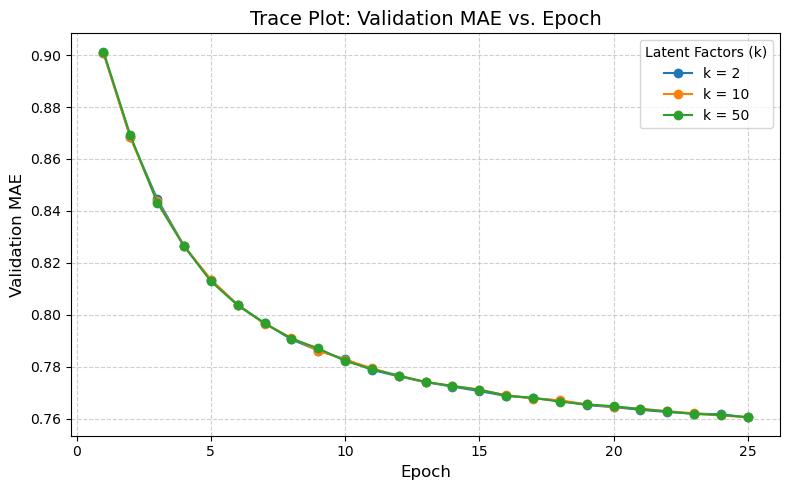

In [16]:
import matplotlib.pyplot as plt

# Organize data by k
results_by_k = {}
for result in all_results:
    k = result["k"]
    if k not in results_by_k:
        results_by_k[k] = {"epochs": [], "mae_valid": []}
    results_by_k[k]["epochs"].append(result["epoch"] + 1)  # Convert to 1-based epoch
    results_by_k[k]["mae_valid"].append(result["mae_valid"])

# Debugging: Check data structure
print("Data grouped by k:")
for k, values in results_by_k.items():
    print(f"k = {k}, Number of epochs: {len(values['epochs'])}")

# Plotting
plt.figure(figsize=(8, 5))

for k, values in results_by_k.items():
    plt.plot(values["epochs"], values["mae_valid"], marker='o', label=f"k = {k}")

# Plot customization
plt.title("Trace Plot: Validation MAE vs. Epoch", fontsize=14)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Validation MAE", fontsize=12)
plt.legend(title="Latent Factors (k)", fontsize=10)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()

# Display the plot
plt.show()

Data grouped by k:
k = 2, Number of epochs: 25
k = 10, Number of epochs: 25
k = 50, Number of epochs: 25


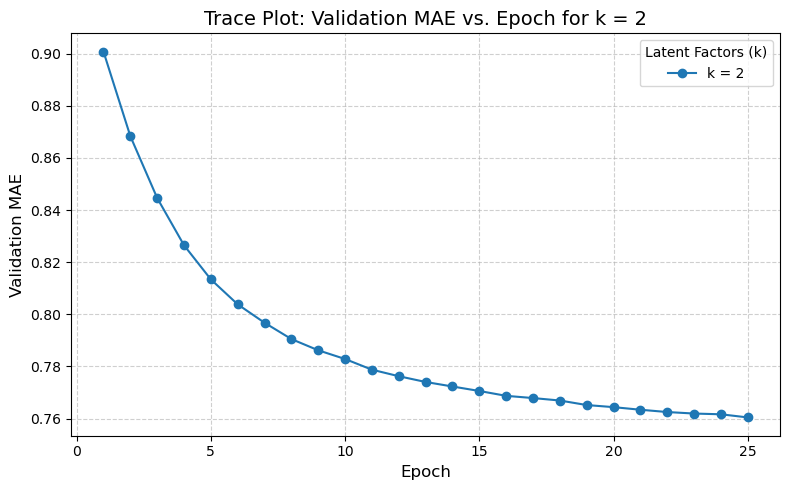

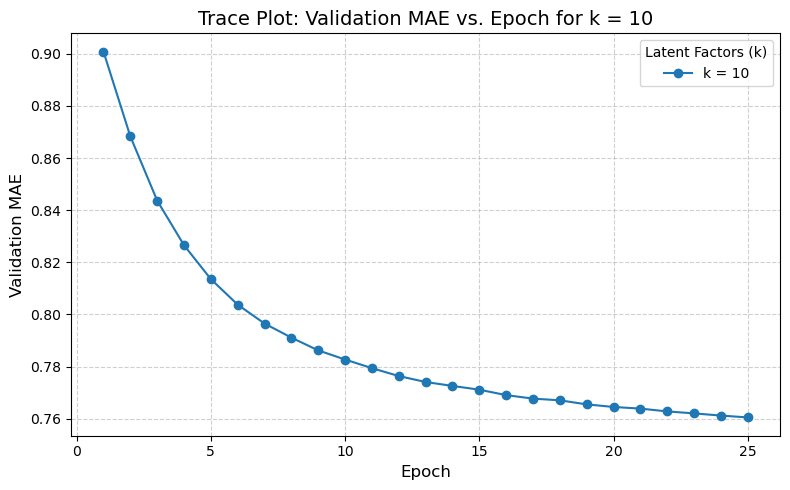

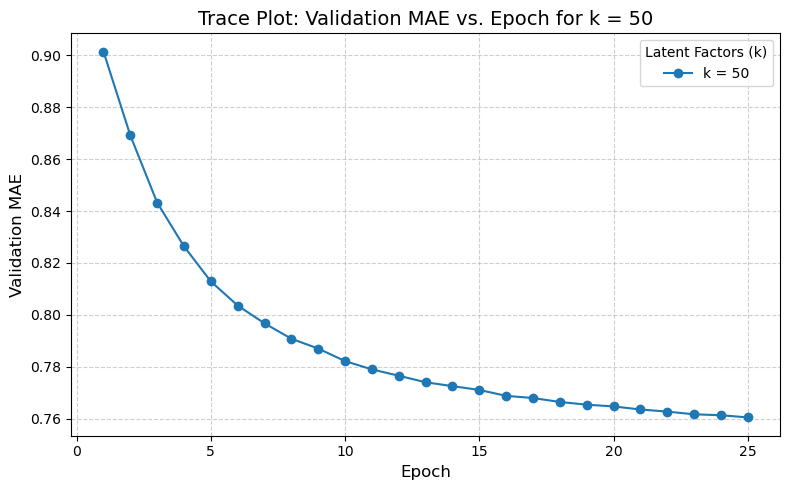

In [22]:
import matplotlib.pyplot as plt

# Organize data by k
results_by_k = {}
for result in all_results:
    k = result["k"]
    if k not in results_by_k:
        results_by_k[k] = {"epochs": [], "mae_valid": []}
    results_by_k[k]["epochs"].append(result["epoch"] + 1)  # Convert to 1-based epoch
    results_by_k[k]["mae_valid"].append(result["mae_valid"])

# Debugging: Check data structure
print("Data grouped by k:")
for k, values in results_by_k.items():
    print(f"k = {k}, Number of epochs: {len(values['epochs'])}")

# Create separate plots for each k
for k, values in results_by_k.items():
    plt.figure(figsize=(8, 5))
    plt.plot(values["epochs"], values["mae_valid"], marker='o', label=f"k = {k}")

    # Plot customization
    plt.title(f"Trace Plot: Validation MAE vs. Epoch for k = {k}", fontsize=14)
    plt.xlabel("Epoch", fontsize=12)
    plt.ylabel("Validation MAE", fontsize=12)
    plt.legend(title="Latent Factors (k)", fontsize=10)
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()

    # Display the plot
    plt.show()


In [23]:
## training with different alpha vals ##
train_tuple, valid_tuple, test_tuple, n_users, n_items = load_train_valid_test_datasets()

# Hyperparameters
n_epochs = 10
batch_size = 64
step_size = 0.1
alpha_vals = [0.01, 0.1, 1, 10, 100]
k = 50

all_results = []
best_results = []

for alpha in alpha_vals:
    print(f"\nTraining model with k = {k}, alpha = {alpha}")
    model = CollabFilterOneVectorPerItem(
        n_epochs=n_epochs,
        batch_size=batch_size,
        step_size=step_size,
        n_factors=k,
        alpha=alpha,
    )
    model.init_parameter_dict(n_users, n_items, train_tuple)

    best_mae_valid = float('inf')
    best_epoch = 0
    best_params = None

    for epoch in range(n_epochs):
        # Train the model for one epoch
        model.fit(train_tuple, valid_tuple)

        # Validation metrics
        user_id_valid, item_id_valid, y_valid = valid_tuple
        y_pred_valid = model.predict(user_id_valid, item_id_valid)
#         mse_valid = ag_np.mean((y_pred_valid - y_valid) ** 2)
        mae_valid = ag_np.mean(ag_np.abs(y_pred_valid - y_valid))
        params = model.param_dict.copy()
    
        if mae_valid < best_mae_valid:
            best_mae_valid = mae_valid
            best_epoch = epoch
            best_params = params

        print(f"Epoch {epoch + 1}/{n_epochs} - Validation MSE: {mse_valid:.4f}")
        
        all_results.append({        
            "k": k,
            "alpha": alpha,
            "mae_valid": mae_valid,
            "epoch": epoch})
        
        print("ALL RESULTS: ", all_results)
        
    # Load the best parameters
    model.param_dict = best_params

    # Compute final MAE metrics
    user_id_test, item_id_test, y_test = test_tuple
    y_pred_test = model.predict(user_id_test, item_id_test)
    mae_test = ag_np.mean(ag_np.abs(y_pred_test - y_test))

    mae_valid = ag_np.mean(ag_np.abs(model.predict(user_id_valid, item_id_valid) - y_valid))

    # Save results
    best_results.append({
        "k": k,
        "alpha": alpha,
        "mae_valid": mae_valid,
        "mae_test": mae_test,
        "best_epoch": best_epoch,
        "params": best_params
    })

    print(f"Results for k={k}, alpha={alpha}:")
    print(f"  Best epoch: {best_epoch}")
    print(f"  Validation MAE: {mae_valid:.4f}")
    print(f"  Test MAE: {mae_test:.4f}")

# Final results summary
for res in best_results:
    print(f"k={res['k']}, Validation MAE={res['mae_valid']:.4f}, Test MAE={res['mae_test']:.4f}")


Training model with k = 50, alpha = 0.01
epoch       0.000 | loss_total     0.17971 | train_MAE     3.53059 | valid_MAE     3.54504 | grad_wrt_mu     0.09961 | grad_wrt_b_per_user     0.00011 | grad_wrt_c_per_item     0.00006 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.001 | loss_total     0.20912 | train_MAE     3.52058 | valid_MAE     3.53504 | grad_wrt_mu     0.11052 | grad_wrt_b_per_user     0.00012 | grad_wrt_c_per_item     0.00007 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.002 | loss_total     0.20819 | train_MAE     3.50949 | valid_MAE     3.52394 | grad_wrt_mu     0.10773 | grad_wrt_b_per_user     0.00011 | grad_wrt_c_per_item     0.00006 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.003 | loss_total     0.21087 | train_MAE     3.49868 | valid_MAE     3.51313 | grad_wrt_mu     0.10934 | grad_wrt_b_per_user     0.00012 | grad_wrt_c_per_item     0.00007 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.125 

epoch       0.125 | loss_total     0.01976 | train_MAE     0.93037 | valid_MAE     0.93242 | grad_wrt_mu     0.00085 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.251 | loss_total     0.02068 | train_MAE     0.93026 | valid_MAE     0.93232 | grad_wrt_mu     0.00723 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.376 | loss_total     0.01695 | train_MAE     0.92965 | valid_MAE     0.93170 | grad_wrt_mu     0.00018 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.500 | loss_total     0.02163 | train_MAE     0.92902 | valid_MAE     0.93103 | grad_wrt_mu     0.00457 | grad_wrt_b_per_user     0.00004 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.625 | loss_total     0.01854 | train_MAE     0

epoch       0.251 | loss_total     0.01797 | train_MAE     0.91924 | valid_MAE     0.92223 | grad_wrt_mu     0.00013 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.376 | loss_total     0.02122 | train_MAE     0.91878 | valid_MAE     0.92174 | grad_wrt_mu     0.00427 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.500 | loss_total     0.01854 | train_MAE     0.91859 | valid_MAE     0.92155 | grad_wrt_mu     0.00134 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.625 | loss_total     0.01881 | train_MAE     0.91821 | valid_MAE     0.92116 | grad_wrt_mu     0.00122 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.751 | loss_total     0.02583 | train_MAE     0

epoch       0.251 | loss_total     0.01995 | train_MAE     0.91188 | valid_MAE     0.91540 | grad_wrt_mu     0.00001 | grad_wrt_b_per_user     0.00004 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.376 | loss_total     0.02137 | train_MAE     0.91156 | valid_MAE     0.91506 | grad_wrt_mu     0.00262 | grad_wrt_b_per_user     0.00004 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.500 | loss_total     0.02570 | train_MAE     0.91182 | valid_MAE     0.91536 | grad_wrt_mu     0.00237 | grad_wrt_b_per_user     0.00004 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.625 | loss_total     0.02230 | train_MAE     0.91194 | valid_MAE     0.91551 | grad_wrt_mu     0.00122 | grad_wrt_b_per_user     0.00004 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.751 | loss_total     0.02398 | train_MAE     0

epoch       0.251 | loss_total     0.01534 | train_MAE     0.90738 | valid_MAE     0.91125 | grad_wrt_mu     0.00084 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.376 | loss_total     0.01503 | train_MAE     0.90830 | valid_MAE     0.91225 | grad_wrt_mu     0.01071 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.500 | loss_total     0.01958 | train_MAE     0.90752 | valid_MAE     0.91141 | grad_wrt_mu     0.00311 | grad_wrt_b_per_user     0.00004 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.625 | loss_total     0.02336 | train_MAE     0.90763 | valid_MAE     0.91153 | grad_wrt_mu     0.00081 | grad_wrt_b_per_user     0.00004 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.751 | loss_total     0.01750 | train_MAE     0

epoch       0.251 | loss_total     0.02059 | train_MAE     0.90470 | valid_MAE     0.90880 | grad_wrt_mu     0.00101 | grad_wrt_b_per_user     0.00004 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.376 | loss_total     0.02511 | train_MAE     0.90414 | valid_MAE     0.90820 | grad_wrt_mu     0.00321 | grad_wrt_b_per_user     0.00004 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.500 | loss_total     0.01843 | train_MAE     0.90344 | valid_MAE     0.90745 | grad_wrt_mu     0.00162 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.625 | loss_total     0.01760 | train_MAE     0.90448 | valid_MAE     0.90858 | grad_wrt_mu     0.00322 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.751 | loss_total     0.01815 | train_MAE     0

epoch       0.125 | loss_total     0.02259 | train_MAE     0.90315 | valid_MAE     0.90743 | grad_wrt_mu     0.00802 | grad_wrt_b_per_user     0.00004 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.251 | loss_total     0.02108 | train_MAE     0.90304 | valid_MAE     0.90730 | grad_wrt_mu     0.00123 | grad_wrt_b_per_user     0.00004 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.376 | loss_total     0.02297 | train_MAE     0.90348 | valid_MAE     0.90779 | grad_wrt_mu     0.00195 | grad_wrt_b_per_user     0.00004 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.500 | loss_total     0.01946 | train_MAE     0.90336 | valid_MAE     0.90765 | grad_wrt_mu     0.00001 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.625 | loss_total     0.01838 | train_MAE     0

epoch       0.125 | loss_total     0.01661 | train_MAE     0.90189 | valid_MAE     0.90625 | grad_wrt_mu     0.00048 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.251 | loss_total     0.02408 | train_MAE     0.90172 | valid_MAE     0.90606 | grad_wrt_mu     0.00408 | grad_wrt_b_per_user     0.00004 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.376 | loss_total     0.01740 | train_MAE     0.90208 | valid_MAE     0.90645 | grad_wrt_mu     0.00473 | grad_wrt_b_per_user     0.00004 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.500 | loss_total     0.01745 | train_MAE     0.90163 | valid_MAE     0.90598 | grad_wrt_mu     0.00098 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.625 | loss_total     0.01644 | train_MAE     0

epoch       0.125 | loss_total     0.02195 | train_MAE     0.90055 | valid_MAE     0.90492 | grad_wrt_mu     0.00142 | grad_wrt_b_per_user     0.00004 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.251 | loss_total     0.02219 | train_MAE     0.90128 | valid_MAE     0.90570 | grad_wrt_mu     0.00726 | grad_wrt_b_per_user     0.00004 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.376 | loss_total     0.01350 | train_MAE     0.90147 | valid_MAE     0.90591 | grad_wrt_mu     0.00333 | grad_wrt_b_per_user     0.00003 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.500 | loss_total     0.02338 | train_MAE     0.90158 | valid_MAE     0.90603 | grad_wrt_mu     0.00050 | grad_wrt_b_per_user     0.00004 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.625 | loss_total     0.01754 | train_MAE     0

epoch       0.125 | loss_total     0.02188 | train_MAE     0.90129 | valid_MAE     0.90581 | grad_wrt_mu     0.00078 | grad_wrt_b_per_user     0.00004 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.251 | loss_total     0.02118 | train_MAE     0.90123 | valid_MAE     0.90574 | grad_wrt_mu     0.00266 | grad_wrt_b_per_user     0.00004 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.376 | loss_total     0.02273 | train_MAE     0.90087 | valid_MAE     0.90535 | grad_wrt_mu     0.00679 | grad_wrt_b_per_user     0.00004 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.500 | loss_total     0.02776 | train_MAE     0.90068 | valid_MAE     0.90514 | grad_wrt_mu     0.00653 | grad_wrt_b_per_user     0.00004 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.625 | loss_total     0.02061 | train_MAE     0

epoch       0.125 | loss_total     0.09847 | train_MAE     2.34940 | valid_MAE     2.36273 | grad_wrt_mu     0.06353 | grad_wrt_b_per_user     0.00008 | grad_wrt_c_per_item     0.00004 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.251 | loss_total     0.06780 | train_MAE     1.68008 | valid_MAE     1.68915 | grad_wrt_mu     0.04560 | grad_wrt_b_per_user     0.00006 | grad_wrt_c_per_item     0.00003 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.376 | loss_total     0.04520 | train_MAE     1.36822 | valid_MAE     1.37564 | grad_wrt_mu     0.02663 | grad_wrt_b_per_user     0.00005 | grad_wrt_c_per_item     0.00003 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.500 | loss_total     0.03635 | train_MAE     1.17752 | valid_MAE     1.18396 | grad_wrt_mu     0.01654 | grad_wrt_b_per_user     0.00004 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.625 | loss_total     0.03714 | train_MAE     1

epoch       0.125 | loss_total     0.03594 | train_MAE     0.97335 | valid_MAE     0.97716 | grad_wrt_mu     0.00097 | grad_wrt_b_per_user     0.00004 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.251 | loss_total     0.03868 | train_MAE     0.97341 | valid_MAE     0.97723 | grad_wrt_mu     0.00706 | grad_wrt_b_per_user     0.00004 | grad_wrt_c_per_item     0.00003 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.376 | loss_total     0.03313 | train_MAE     0.97300 | valid_MAE     0.97678 | grad_wrt_mu     0.00008 | grad_wrt_b_per_user     0.00004 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.500 | loss_total     0.03933 | train_MAE     0.97253 | valid_MAE     0.97628 | grad_wrt_mu     0.00465 | grad_wrt_b_per_user     0.00005 | grad_wrt_c_per_item     0.00003 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.625 | loss_total     0.03531 | train_MAE     0

epoch       0.125 | loss_total     0.03710 | train_MAE     0.97305 | valid_MAE     0.97686 | grad_wrt_mu     0.00386 | grad_wrt_b_per_user     0.00004 | grad_wrt_c_per_item     0.00003 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.251 | loss_total     0.03378 | train_MAE     0.97325 | valid_MAE     0.97708 | grad_wrt_mu     0.00011 | grad_wrt_b_per_user     0.00004 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.376 | loss_total     0.03641 | train_MAE     0.97286 | valid_MAE     0.97666 | grad_wrt_mu     0.00401 | grad_wrt_b_per_user     0.00004 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.500 | loss_total     0.03476 | train_MAE     0.97275 | valid_MAE     0.97654 | grad_wrt_mu     0.00111 | grad_wrt_b_per_user     0.00004 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.625 | loss_total     0.03517 | train_MAE     0

epoch       0.125 | loss_total     0.03636 | train_MAE     0.97292 | valid_MAE     0.97673 | grad_wrt_mu     0.00094 | grad_wrt_b_per_user     0.00004 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.251 | loss_total     0.03617 | train_MAE     0.97270 | valid_MAE     0.97648 | grad_wrt_mu     0.00006 | grad_wrt_b_per_user     0.00005 | grad_wrt_c_per_item     0.00003 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.376 | loss_total     0.03919 | train_MAE     0.97248 | valid_MAE     0.97624 | grad_wrt_mu     0.00278 | grad_wrt_b_per_user     0.00005 | grad_wrt_c_per_item     0.00003 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.500 | loss_total     0.04126 | train_MAE     0.97287 | valid_MAE     0.97667 | grad_wrt_mu     0.00248 | grad_wrt_b_per_user     0.00005 | grad_wrt_c_per_item     0.00003 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.625 | loss_total     0.03898 | train_MAE     0

epoch       0.125 | loss_total     0.03895 | train_MAE     0.97259 | valid_MAE     0.97636 | grad_wrt_mu     0.00152 | grad_wrt_b_per_user     0.00004 | grad_wrt_c_per_item     0.00003 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.251 | loss_total     0.03103 | train_MAE     0.97258 | valid_MAE     0.97636 | grad_wrt_mu     0.00103 | grad_wrt_b_per_user     0.00004 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.376 | loss_total     0.03427 | train_MAE     0.97357 | valid_MAE     0.97743 | grad_wrt_mu     0.01050 | grad_wrt_b_per_user     0.00004 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.500 | loss_total     0.03651 | train_MAE     0.97279 | valid_MAE     0.97657 | grad_wrt_mu     0.00291 | grad_wrt_b_per_user     0.00004 | grad_wrt_c_per_item     0.00003 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.625 | loss_total     0.04022 | train_MAE     0

epoch       0.125 | loss_total     0.04016 | train_MAE     0.97224 | valid_MAE     0.97598 | grad_wrt_mu     0.00459 | grad_wrt_b_per_user     0.00005 | grad_wrt_c_per_item     0.00003 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.251 | loss_total     0.03747 | train_MAE     0.97277 | valid_MAE     0.97656 | grad_wrt_mu     0.00149 | grad_wrt_b_per_user     0.00004 | grad_wrt_c_per_item     0.00003 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.376 | loss_total     0.04064 | train_MAE     0.97225 | valid_MAE     0.97599 | grad_wrt_mu     0.00318 | grad_wrt_b_per_user     0.00005 | grad_wrt_c_per_item     0.00003 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.500 | loss_total     0.03543 | train_MAE     0.97158 | valid_MAE     0.97527 | grad_wrt_mu     0.00237 | grad_wrt_b_per_user     0.00004 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.625 | loss_total     0.03520 | train_MAE     0

epoch       0.125 | loss_total     0.03634 | train_MAE     0.97301 | valid_MAE     0.97683 | grad_wrt_mu     0.00781 | grad_wrt_b_per_user     0.00004 | grad_wrt_c_per_item     0.00003 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.251 | loss_total     0.03782 | train_MAE     0.97288 | valid_MAE     0.97668 | grad_wrt_mu     0.00190 | grad_wrt_b_per_user     0.00005 | grad_wrt_c_per_item     0.00003 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.376 | loss_total     0.04070 | train_MAE     0.97338 | valid_MAE     0.97723 | grad_wrt_mu     0.00165 | grad_wrt_b_per_user     0.00005 | grad_wrt_c_per_item     0.00003 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.500 | loss_total     0.03647 | train_MAE     0.97326 | valid_MAE     0.97710 | grad_wrt_mu     0.00006 | grad_wrt_b_per_user     0.00004 | grad_wrt_c_per_item     0.00003 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.625 | loss_total     0.03382 | train_MAE     0

epoch       0.125 | loss_total     0.03327 | train_MAE     0.97293 | valid_MAE     0.97674 | grad_wrt_mu     0.00048 | grad_wrt_b_per_user     0.00004 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.251 | loss_total     0.04090 | train_MAE     0.97282 | valid_MAE     0.97661 | grad_wrt_mu     0.00440 | grad_wrt_b_per_user     0.00005 | grad_wrt_c_per_item     0.00003 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.376 | loss_total     0.03239 | train_MAE     0.97312 | valid_MAE     0.97694 | grad_wrt_mu     0.00438 | grad_wrt_b_per_user     0.00004 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.500 | loss_total     0.03312 | train_MAE     0.97273 | valid_MAE     0.97651 | grad_wrt_mu     0.00060 | grad_wrt_b_per_user     0.00004 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.625 | loss_total     0.03369 | train_MAE     0

epoch       0.125 | loss_total     0.03900 | train_MAE     0.97238 | valid_MAE     0.97613 | grad_wrt_mu     0.00168 | grad_wrt_b_per_user     0.00005 | grad_wrt_c_per_item     0.00003 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.251 | loss_total     0.03653 | train_MAE     0.97311 | valid_MAE     0.97693 | grad_wrt_mu     0.00688 | grad_wrt_b_per_user     0.00004 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.376 | loss_total     0.03077 | train_MAE     0.97331 | valid_MAE     0.97715 | grad_wrt_mu     0.00351 | grad_wrt_b_per_user     0.00004 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.500 | loss_total     0.03982 | train_MAE     0.97342 | valid_MAE     0.97727 | grad_wrt_mu     0.00036 | grad_wrt_b_per_user     0.00005 | grad_wrt_c_per_item     0.00003 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.625 | loss_total     0.03579 | train_MAE     0

epoch       0.125 | loss_total     0.03796 | train_MAE     0.97361 | valid_MAE     0.97748 | grad_wrt_mu     0.00033 | grad_wrt_b_per_user     0.00005 | grad_wrt_c_per_item     0.00003 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.251 | loss_total     0.03831 | train_MAE     0.97351 | valid_MAE     0.97737 | grad_wrt_mu     0.00261 | grad_wrt_b_per_user     0.00005 | grad_wrt_c_per_item     0.00003 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.376 | loss_total     0.03691 | train_MAE     0.97317 | valid_MAE     0.97699 | grad_wrt_mu     0.00720 | grad_wrt_b_per_user     0.00004 | grad_wrt_c_per_item     0.00002 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.500 | loss_total     0.04354 | train_MAE     0.97298 | valid_MAE     0.97679 | grad_wrt_mu     0.00721 | grad_wrt_b_per_user     0.00005 | grad_wrt_c_per_item     0.00003 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.625 | loss_total     0.03777 | train_MAE     0

epoch       0.125 | loss_total     0.12630 | train_MAE     2.51547 | valid_MAE     2.52985 | grad_wrt_mu     0.04153 | grad_wrt_b_per_user     0.00010 | grad_wrt_c_per_item     0.00006 | grad_wrt_U     0.00002 | grad_wrt_V     0.00002
epoch       0.251 | loss_total     0.12564 | train_MAE     2.12996 | valid_MAE     2.14190 | grad_wrt_mu     0.02242 | grad_wrt_b_per_user     0.00011 | grad_wrt_c_per_item     0.00006 | grad_wrt_U     0.00001 | grad_wrt_V     0.00001
epoch       0.376 | loss_total     0.11506 | train_MAE     1.97264 | valid_MAE     1.98357 | grad_wrt_mu     0.00832 | grad_wrt_b_per_user     0.00011 | grad_wrt_c_per_item     0.00006 | grad_wrt_U     0.00001 | grad_wrt_V     0.00001
epoch       0.500 | loss_total     0.11200 | train_MAE     1.90316 | valid_MAE     1.91364 | grad_wrt_mu     0.00337 | grad_wrt_b_per_user     0.00010 | grad_wrt_c_per_item     0.00006 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.625 | loss_total     0.11288 | train_MAE     1

epoch       0.125 | loss_total     0.11694 | train_MAE     1.85671 | valid_MAE     1.86692 | grad_wrt_mu     0.00104 | grad_wrt_b_per_user     0.00011 | grad_wrt_c_per_item     0.00006 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.251 | loss_total     0.12818 | train_MAE     1.85761 | valid_MAE     1.86782 | grad_wrt_mu     0.00701 | grad_wrt_b_per_user     0.00012 | grad_wrt_c_per_item     0.00006 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.376 | loss_total     0.11283 | train_MAE     1.85472 | valid_MAE     1.86491 | grad_wrt_mu     0.00007 | grad_wrt_b_per_user     0.00011 | grad_wrt_c_per_item     0.00006 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.500 | loss_total     0.12613 | train_MAE     1.85249 | valid_MAE     1.86266 | grad_wrt_mu     0.00465 | grad_wrt_b_per_user     0.00011 | grad_wrt_c_per_item     0.00006 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.625 | loss_total     0.11852 | train_MAE     1

epoch       0.125 | loss_total     0.12249 | train_MAE     1.85553 | valid_MAE     1.86572 | grad_wrt_mu     0.00388 | grad_wrt_b_per_user     0.00011 | grad_wrt_c_per_item     0.00006 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.251 | loss_total     0.11334 | train_MAE     1.85735 | valid_MAE     1.86756 | grad_wrt_mu     0.00012 | grad_wrt_b_per_user     0.00011 | grad_wrt_c_per_item     0.00006 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.376 | loss_total     0.11046 | train_MAE     1.85448 | valid_MAE     1.86466 | grad_wrt_mu     0.00400 | grad_wrt_b_per_user     0.00010 | grad_wrt_c_per_item     0.00006 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.500 | loss_total     0.11309 | train_MAE     1.85416 | valid_MAE     1.86434 | grad_wrt_mu     0.00110 | grad_wrt_b_per_user     0.00011 | grad_wrt_c_per_item     0.00006 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.625 | loss_total     0.11686 | train_MAE     1

epoch       0.125 | loss_total     0.11460 | train_MAE     1.85504 | valid_MAE     1.86523 | grad_wrt_mu     0.00100 | grad_wrt_b_per_user     0.00011 | grad_wrt_c_per_item     0.00006 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.251 | loss_total     0.11581 | train_MAE     1.85343 | valid_MAE     1.86361 | grad_wrt_mu     0.00015 | grad_wrt_b_per_user     0.00011 | grad_wrt_c_per_item     0.00006 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.376 | loss_total     0.12324 | train_MAE     1.85205 | valid_MAE     1.86221 | grad_wrt_mu     0.00268 | grad_wrt_b_per_user     0.00011 | grad_wrt_c_per_item     0.00006 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.500 | loss_total     0.11736 | train_MAE     1.85521 | valid_MAE     1.86540 | grad_wrt_mu     0.00250 | grad_wrt_b_per_user     0.00010 | grad_wrt_c_per_item     0.00006 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.625 | loss_total     0.12074 | train_MAE     1

epoch       0.125 | loss_total     0.11666 | train_MAE     1.85393 | valid_MAE     1.86411 | grad_wrt_mu     0.00158 | grad_wrt_b_per_user     0.00011 | grad_wrt_c_per_item     0.00006 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.251 | loss_total     0.10924 | train_MAE     1.85368 | valid_MAE     1.86386 | grad_wrt_mu     0.00110 | grad_wrt_b_per_user     0.00011 | grad_wrt_c_per_item     0.00006 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.376 | loss_total     0.12872 | train_MAE     1.86019 | valid_MAE     1.87040 | grad_wrt_mu     0.01058 | grad_wrt_b_per_user     0.00012 | grad_wrt_c_per_item     0.00006 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.500 | loss_total     0.12035 | train_MAE     1.85390 | valid_MAE     1.86408 | grad_wrt_mu     0.00281 | grad_wrt_b_per_user     0.00011 | grad_wrt_c_per_item     0.00006 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.625 | loss_total     0.12137 | train_MAE     1

epoch       0.125 | loss_total     0.11352 | train_MAE     1.85099 | valid_MAE     1.86113 | grad_wrt_mu     0.00472 | grad_wrt_b_per_user     0.00010 | grad_wrt_c_per_item     0.00006 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.251 | loss_total     0.11515 | train_MAE     1.85546 | valid_MAE     1.86563 | grad_wrt_mu     0.00150 | grad_wrt_b_per_user     0.00010 | grad_wrt_c_per_item     0.00006 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.376 | loss_total     0.11606 | train_MAE     1.85193 | valid_MAE     1.86208 | grad_wrt_mu     0.00321 | grad_wrt_b_per_user     0.00011 | grad_wrt_c_per_item     0.00006 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.500 | loss_total     0.11933 | train_MAE     1.84763 | valid_MAE     1.85776 | grad_wrt_mu     0.00234 | grad_wrt_b_per_user     0.00011 | grad_wrt_c_per_item     0.00006 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.625 | loss_total     0.12054 | train_MAE     1

epoch       0.125 | loss_total     0.10471 | train_MAE     1.85594 | valid_MAE     1.86613 | grad_wrt_mu     0.00778 | grad_wrt_b_per_user     0.00010 | grad_wrt_c_per_item     0.00006 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.251 | loss_total     0.11480 | train_MAE     1.85490 | valid_MAE     1.86508 | grad_wrt_mu     0.00202 | grad_wrt_b_per_user     0.00010 | grad_wrt_c_per_item     0.00006 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.376 | loss_total     0.12267 | train_MAE     1.85884 | valid_MAE     1.86904 | grad_wrt_mu     0.00169 | grad_wrt_b_per_user     0.00011 | grad_wrt_c_per_item     0.00006 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.500 | loss_total     0.11622 | train_MAE     1.85734 | valid_MAE     1.86754 | grad_wrt_mu     0.00010 | grad_wrt_b_per_user     0.00011 | grad_wrt_c_per_item     0.00006 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.625 | loss_total     0.10926 | train_MAE     1

epoch       0.125 | loss_total     0.11367 | train_MAE     1.85653 | valid_MAE     1.86674 | grad_wrt_mu     0.00055 | grad_wrt_b_per_user     0.00011 | grad_wrt_c_per_item     0.00006 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.251 | loss_total     0.11448 | train_MAE     1.85571 | valid_MAE     1.86591 | grad_wrt_mu     0.00440 | grad_wrt_b_per_user     0.00011 | grad_wrt_c_per_item     0.00006 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.376 | loss_total     0.10571 | train_MAE     1.85725 | valid_MAE     1.86745 | grad_wrt_mu     0.00428 | grad_wrt_b_per_user     0.00010 | grad_wrt_c_per_item     0.00006 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.500 | loss_total     0.11202 | train_MAE     1.85431 | valid_MAE     1.86449 | grad_wrt_mu     0.00058 | grad_wrt_b_per_user     0.00011 | grad_wrt_c_per_item     0.00006 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.625 | loss_total     0.11214 | train_MAE     1

epoch       0.125 | loss_total     0.12152 | train_MAE     1.85164 | valid_MAE     1.86180 | grad_wrt_mu     0.00163 | grad_wrt_b_per_user     0.00011 | grad_wrt_c_per_item     0.00006 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.251 | loss_total     0.10631 | train_MAE     1.85833 | valid_MAE     1.86854 | grad_wrt_mu     0.00667 | grad_wrt_b_per_user     0.00010 | grad_wrt_c_per_item     0.00006 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.376 | loss_total     0.11536 | train_MAE     1.85851 | valid_MAE     1.86871 | grad_wrt_mu     0.00362 | grad_wrt_b_per_user     0.00011 | grad_wrt_c_per_item     0.00006 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.500 | loss_total     0.11882 | train_MAE     1.85835 | valid_MAE     1.86856 | grad_wrt_mu     0.00030 | grad_wrt_b_per_user     0.00011 | grad_wrt_c_per_item     0.00006 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.625 | loss_total     0.12395 | train_MAE     1

epoch       0.125 | loss_total     0.11691 | train_MAE     1.85926 | valid_MAE     1.86948 | grad_wrt_mu     0.00023 | grad_wrt_b_per_user     0.00011 | grad_wrt_c_per_item     0.00006 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.251 | loss_total     0.12147 | train_MAE     1.85838 | valid_MAE     1.86858 | grad_wrt_mu     0.00263 | grad_wrt_b_per_user     0.00011 | grad_wrt_c_per_item     0.00006 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.376 | loss_total     0.10601 | train_MAE     1.85596 | valid_MAE     1.86616 | grad_wrt_mu     0.00731 | grad_wrt_b_per_user     0.00010 | grad_wrt_c_per_item     0.00006 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.500 | loss_total     0.11285 | train_MAE     1.85470 | valid_MAE     1.86488 | grad_wrt_mu     0.00739 | grad_wrt_b_per_user     0.00011 | grad_wrt_c_per_item     0.00006 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.625 | loss_total     0.11894 | train_MAE     1

epoch       0.125 | loss_total     0.18391 | train_MAE     3.21206 | valid_MAE     3.22653 | grad_wrt_mu     0.00414 | grad_wrt_b_per_user     0.00018 | grad_wrt_c_per_item     0.00010 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.251 | loss_total     0.20541 | train_MAE     3.20730 | valid_MAE     3.22176 | grad_wrt_mu     0.00253 | grad_wrt_b_per_user     0.00019 | grad_wrt_c_per_item     0.00011 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.376 | loss_total     0.19416 | train_MAE     3.20981 | valid_MAE     3.22427 | grad_wrt_mu     0.00046 | grad_wrt_b_per_user     0.00019 | grad_wrt_c_per_item     0.00011 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.500 | loss_total     0.19170 | train_MAE     3.20677 | valid_MAE     3.22123 | grad_wrt_mu     0.00058 | grad_wrt_b_per_user     0.00018 | grad_wrt_c_per_item     0.00011 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.625 | loss_total     0.18990 | train_MAE     3

epoch       0.125 | loss_total     0.19823 | train_MAE     3.20837 | valid_MAE     3.22284 | grad_wrt_mu     0.00094 | grad_wrt_b_per_user     0.00019 | grad_wrt_c_per_item     0.00011 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.251 | loss_total     0.21786 | train_MAE     3.21036 | valid_MAE     3.22482 | grad_wrt_mu     0.00749 | grad_wrt_b_per_user     0.00020 | grad_wrt_c_per_item     0.00011 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.376 | loss_total     0.19269 | train_MAE     3.20857 | valid_MAE     3.22304 | grad_wrt_mu     0.00003 | grad_wrt_b_per_user     0.00019 | grad_wrt_c_per_item     0.00011 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.500 | loss_total     0.21308 | train_MAE     3.20906 | valid_MAE     3.22352 | grad_wrt_mu     0.00509 | grad_wrt_b_per_user     0.00019 | grad_wrt_c_per_item     0.00011 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.625 | loss_total     0.20192 | train_MAE     3

epoch       0.125 | loss_total     0.20801 | train_MAE     3.20561 | valid_MAE     3.22007 | grad_wrt_mu     0.00292 | grad_wrt_b_per_user     0.00019 | grad_wrt_c_per_item     0.00011 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.251 | loss_total     0.19317 | train_MAE     3.21019 | valid_MAE     3.22465 | grad_wrt_mu     0.00059 | grad_wrt_b_per_user     0.00019 | grad_wrt_c_per_item     0.00011 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.376 | loss_total     0.18466 | train_MAE     3.20913 | valid_MAE     3.22360 | grad_wrt_mu     0.00368 | grad_wrt_b_per_user     0.00018 | grad_wrt_c_per_item     0.00011 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.500 | loss_total     0.19152 | train_MAE     3.20907 | valid_MAE     3.22353 | grad_wrt_mu     0.00077 | grad_wrt_b_per_user     0.00019 | grad_wrt_c_per_item     0.00010 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.625 | loss_total     0.19881 | train_MAE     3

epoch       0.125 | loss_total     0.19301 | train_MAE     3.20784 | valid_MAE     3.22230 | grad_wrt_mu     0.00119 | grad_wrt_b_per_user     0.00019 | grad_wrt_c_per_item     0.00011 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.251 | loss_total     0.19563 | train_MAE     3.20729 | valid_MAE     3.22175 | grad_wrt_mu     0.00040 | grad_wrt_b_per_user     0.00019 | grad_wrt_c_per_item     0.00011 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.376 | loss_total     0.20736 | train_MAE     3.20476 | valid_MAE     3.21922 | grad_wrt_mu     0.00166 | grad_wrt_b_per_user     0.00019 | grad_wrt_c_per_item     0.00011 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.500 | loss_total     0.19370 | train_MAE     3.20751 | valid_MAE     3.22197 | grad_wrt_mu     0.00277 | grad_wrt_b_per_user     0.00018 | grad_wrt_c_per_item     0.00011 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.625 | loss_total     0.20270 | train_MAE     3

epoch       0.125 | loss_total     0.19438 | train_MAE     3.20992 | valid_MAE     3.22439 | grad_wrt_mu     0.00096 | grad_wrt_b_per_user     0.00019 | grad_wrt_c_per_item     0.00011 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.251 | loss_total     0.18764 | train_MAE     3.20790 | valid_MAE     3.22235 | grad_wrt_mu     0.00117 | grad_wrt_b_per_user     0.00019 | grad_wrt_c_per_item     0.00011 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.376 | loss_total     0.22334 | train_MAE     3.20988 | valid_MAE     3.22434 | grad_wrt_mu     0.01074 | grad_wrt_b_per_user     0.00020 | grad_wrt_c_per_item     0.00011 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.500 | loss_total     0.20442 | train_MAE     3.20652 | valid_MAE     3.22098 | grad_wrt_mu     0.00226 | grad_wrt_b_per_user     0.00019 | grad_wrt_c_per_item     0.00011 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.625 | loss_total     0.20263 | train_MAE     3

epoch       0.125 | loss_total     0.18701 | train_MAE     3.20807 | valid_MAE     3.22253 | grad_wrt_mu     0.00453 | grad_wrt_b_per_user     0.00018 | grad_wrt_c_per_item     0.00011 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.251 | loss_total     0.19290 | train_MAE     3.20946 | valid_MAE     3.22392 | grad_wrt_mu     0.00113 | grad_wrt_b_per_user     0.00018 | grad_wrt_c_per_item     0.00010 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.376 | loss_total     0.19167 | train_MAE     3.20774 | valid_MAE     3.22220 | grad_wrt_mu     0.00318 | grad_wrt_b_per_user     0.00018 | grad_wrt_c_per_item     0.00010 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.500 | loss_total     0.20345 | train_MAE     3.20588 | valid_MAE     3.22034 | grad_wrt_mu     0.00204 | grad_wrt_b_per_user     0.00019 | grad_wrt_c_per_item     0.00011 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.625 | loss_total     0.20607 | train_MAE     3

epoch       0.125 | loss_total     0.17325 | train_MAE     3.20734 | valid_MAE     3.22180 | grad_wrt_mu     0.00820 | grad_wrt_b_per_user     0.00018 | grad_wrt_c_per_item     0.00010 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.251 | loss_total     0.19183 | train_MAE     3.20893 | valid_MAE     3.22339 | grad_wrt_mu     0.00180 | grad_wrt_b_per_user     0.00018 | grad_wrt_c_per_item     0.00010 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.376 | loss_total     0.20466 | train_MAE     3.21037 | valid_MAE     3.22483 | grad_wrt_mu     0.00211 | grad_wrt_b_per_user     0.00019 | grad_wrt_c_per_item     0.00011 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.500 | loss_total     0.19609 | train_MAE     3.20884 | valid_MAE     3.22330 | grad_wrt_mu     0.00012 | grad_wrt_b_per_user     0.00019 | grad_wrt_c_per_item     0.00010 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.625 | loss_total     0.18484 | train_MAE     3

epoch       0.125 | loss_total     0.19423 | train_MAE     3.21023 | valid_MAE     3.22469 | grad_wrt_mu     0.00109 | grad_wrt_b_per_user     0.00019 | grad_wrt_c_per_item     0.00011 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.251 | loss_total     0.18799 | train_MAE     3.20940 | valid_MAE     3.22386 | grad_wrt_mu     0.00407 | grad_wrt_b_per_user     0.00018 | grad_wrt_c_per_item     0.00010 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.376 | loss_total     0.17921 | train_MAE     3.20756 | valid_MAE     3.22202 | grad_wrt_mu     0.00471 | grad_wrt_b_per_user     0.00019 | grad_wrt_c_per_item     0.00010 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.500 | loss_total     0.19114 | train_MAE     3.20878 | valid_MAE     3.22324 | grad_wrt_mu     0.00038 | grad_wrt_b_per_user     0.00019 | grad_wrt_c_per_item     0.00011 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.625 | loss_total     0.19057 | train_MAE     3

epoch       0.125 | loss_total     0.20424 | train_MAE     3.20624 | valid_MAE     3.22070 | grad_wrt_mu     0.00118 | grad_wrt_b_per_user     0.00019 | grad_wrt_c_per_item     0.00011 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.251 | loss_total     0.17629 | train_MAE     3.21250 | valid_MAE     3.22697 | grad_wrt_mu     0.00546 | grad_wrt_b_per_user     0.00018 | grad_wrt_c_per_item     0.00010 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.376 | loss_total     0.20013 | train_MAE     3.20889 | valid_MAE     3.22335 | grad_wrt_mu     0.00356 | grad_wrt_b_per_user     0.00019 | grad_wrt_c_per_item     0.00011 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.500 | loss_total     0.19796 | train_MAE     3.20795 | valid_MAE     3.22241 | grad_wrt_mu     0.00067 | grad_wrt_b_per_user     0.00019 | grad_wrt_c_per_item     0.00011 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.625 | loss_total     0.21228 | train_MAE     3

epoch       0.125 | loss_total     0.19602 | train_MAE     3.20877 | valid_MAE     3.22322 | grad_wrt_mu     0.00039 | grad_wrt_b_per_user     0.00019 | grad_wrt_c_per_item     0.00011 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.251 | loss_total     0.20484 | train_MAE     3.20921 | valid_MAE     3.22367 | grad_wrt_mu     0.00269 | grad_wrt_b_per_user     0.00019 | grad_wrt_c_per_item     0.00011 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.376 | loss_total     0.17525 | train_MAE     3.20905 | valid_MAE     3.22352 | grad_wrt_mu     0.00712 | grad_wrt_b_per_user     0.00018 | grad_wrt_c_per_item     0.00010 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.500 | loss_total     0.18211 | train_MAE     3.20739 | valid_MAE     3.22185 | grad_wrt_mu     0.00769 | grad_wrt_b_per_user     0.00018 | grad_wrt_c_per_item     0.00010 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.625 | loss_total     0.20020 | train_MAE     3

epoch       0.125 | loss_total     0.19822 | train_MAE     3.49545 | valid_MAE     3.50990 | grad_wrt_mu     0.00550 | grad_wrt_b_per_user     0.00020 | grad_wrt_c_per_item     0.00012 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.251 | loss_total     0.22209 | train_MAE     3.49548 | valid_MAE     3.50993 | grad_wrt_mu     0.00288 | grad_wrt_b_per_user     0.00021 | grad_wrt_c_per_item     0.00012 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.376 | loss_total     0.20999 | train_MAE     3.49554 | valid_MAE     3.50999 | grad_wrt_mu     0.00016 | grad_wrt_b_per_user     0.00020 | grad_wrt_c_per_item     0.00012 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.500 | loss_total     0.20755 | train_MAE     3.49480 | valid_MAE     3.50925 | grad_wrt_mu     0.00218 | grad_wrt_b_per_user     0.00020 | grad_wrt_c_per_item     0.00012 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.625 | loss_total     0.20517 | train_MAE     3

epoch       0.125 | loss_total     0.21435 | train_MAE     3.49578 | valid_MAE     3.51023 | grad_wrt_mu     0.00187 | grad_wrt_b_per_user     0.00020 | grad_wrt_c_per_item     0.00012 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.251 | loss_total     0.23563 | train_MAE     3.49509 | valid_MAE     3.50954 | grad_wrt_mu     0.00558 | grad_wrt_b_per_user     0.00022 | grad_wrt_c_per_item     0.00012 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.376 | loss_total     0.20852 | train_MAE     3.49604 | valid_MAE     3.51049 | grad_wrt_mu     0.00169 | grad_wrt_b_per_user     0.00021 | grad_wrt_c_per_item     0.00011 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.500 | loss_total     0.23033 | train_MAE     3.49596 | valid_MAE     3.51041 | grad_wrt_mu     0.00634 | grad_wrt_b_per_user     0.00021 | grad_wrt_c_per_item     0.00012 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.625 | loss_total     0.21845 | train_MAE     3

epoch       0.125 | loss_total     0.22499 | train_MAE     3.49483 | valid_MAE     3.50928 | grad_wrt_mu     0.00181 | grad_wrt_b_per_user     0.00021 | grad_wrt_c_per_item     0.00012 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.251 | loss_total     0.20901 | train_MAE     3.49633 | valid_MAE     3.51079 | grad_wrt_mu     0.00263 | grad_wrt_b_per_user     0.00020 | grad_wrt_c_per_item     0.00012 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.376 | loss_total     0.19938 | train_MAE     3.49644 | valid_MAE     3.51089 | grad_wrt_mu     0.00093 | grad_wrt_b_per_user     0.00020 | grad_wrt_c_per_item     0.00012 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.500 | loss_total     0.20709 | train_MAE     3.49601 | valid_MAE     3.51046 | grad_wrt_mu     0.00064 | grad_wrt_b_per_user     0.00020 | grad_wrt_c_per_item     0.00011 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.625 | loss_total     0.21507 | train_MAE     3

epoch       0.125 | loss_total     0.20856 | train_MAE     3.49610 | valid_MAE     3.51055 | grad_wrt_mu     0.00093 | grad_wrt_b_per_user     0.00020 | grad_wrt_c_per_item     0.00012 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.251 | loss_total     0.21146 | train_MAE     3.49542 | valid_MAE     3.50987 | grad_wrt_mu     0.00021 | grad_wrt_b_per_user     0.00021 | grad_wrt_c_per_item     0.00012 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.376 | loss_total     0.22405 | train_MAE     3.49413 | valid_MAE     3.50858 | grad_wrt_mu     0.00136 | grad_wrt_b_per_user     0.00021 | grad_wrt_c_per_item     0.00012 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.500 | loss_total     0.20886 | train_MAE     3.49475 | valid_MAE     3.50920 | grad_wrt_mu     0.00478 | grad_wrt_b_per_user     0.00020 | grad_wrt_c_per_item     0.00012 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.625 | loss_total     0.21897 | train_MAE     3

epoch       0.125 | loss_total     0.20980 | train_MAE     3.49622 | valid_MAE     3.51068 | grad_wrt_mu     0.00085 | grad_wrt_b_per_user     0.00021 | grad_wrt_c_per_item     0.00011 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.251 | loss_total     0.20319 | train_MAE     3.49511 | valid_MAE     3.50956 | grad_wrt_mu     0.00220 | grad_wrt_b_per_user     0.00021 | grad_wrt_c_per_item     0.00012 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.376 | loss_total     0.24210 | train_MAE     3.49549 | valid_MAE     3.50994 | grad_wrt_mu     0.01023 | grad_wrt_b_per_user     0.00022 | grad_wrt_c_per_item     0.00012 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.500 | loss_total     0.22112 | train_MAE     3.49535 | valid_MAE     3.50980 | grad_wrt_mu     0.00250 | grad_wrt_b_per_user     0.00021 | grad_wrt_c_per_item     0.00012 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.625 | loss_total     0.21875 | train_MAE     3

epoch       0.125 | loss_total     0.20160 | train_MAE     3.49564 | valid_MAE     3.51009 | grad_wrt_mu     0.00395 | grad_wrt_b_per_user     0.00020 | grad_wrt_c_per_item     0.00012 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.251 | loss_total     0.20833 | train_MAE     3.49568 | valid_MAE     3.51013 | grad_wrt_mu     0.00089 | grad_wrt_b_per_user     0.00021 | grad_wrt_c_per_item     0.00011 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.376 | loss_total     0.20668 | train_MAE     3.49473 | valid_MAE     3.50919 | grad_wrt_mu     0.00531 | grad_wrt_b_per_user     0.00020 | grad_wrt_c_per_item     0.00012 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.500 | loss_total     0.22014 | train_MAE     3.49516 | valid_MAE     3.50961 | grad_wrt_mu     0.00189 | grad_wrt_b_per_user     0.00021 | grad_wrt_c_per_item     0.00012 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.625 | loss_total     0.22304 | train_MAE     3

epoch       0.125 | loss_total     0.18683 | train_MAE     3.49539 | valid_MAE     3.50984 | grad_wrt_mu     0.00816 | grad_wrt_b_per_user     0.00019 | grad_wrt_c_per_item     0.00012 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.251 | loss_total     0.20712 | train_MAE     3.49609 | valid_MAE     3.51055 | grad_wrt_mu     0.00006 | grad_wrt_b_per_user     0.00019 | grad_wrt_c_per_item     0.00011 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.376 | loss_total     0.22092 | train_MAE     3.49545 | valid_MAE     3.50990 | grad_wrt_mu     0.00133 | grad_wrt_b_per_user     0.00020 | grad_wrt_c_per_item     0.00012 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.500 | loss_total     0.21194 | train_MAE     3.49508 | valid_MAE     3.50953 | grad_wrt_mu     0.00129 | grad_wrt_b_per_user     0.00020 | grad_wrt_c_per_item     0.00012 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.625 | loss_total     0.19984 | train_MAE     3

epoch       0.125 | loss_total     0.21022 | train_MAE     3.49554 | valid_MAE     3.50999 | grad_wrt_mu     0.00064 | grad_wrt_b_per_user     0.00021 | grad_wrt_c_per_item     0.00012 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.251 | loss_total     0.20258 | train_MAE     3.49479 | valid_MAE     3.50924 | grad_wrt_mu     0.00660 | grad_wrt_b_per_user     0.00020 | grad_wrt_c_per_item     0.00011 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.376 | loss_total     0.19380 | train_MAE     3.49386 | valid_MAE     3.50831 | grad_wrt_mu     0.00953 | grad_wrt_b_per_user     0.00021 | grad_wrt_c_per_item     0.00011 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.500 | loss_total     0.20683 | train_MAE     3.49562 | valid_MAE     3.51007 | grad_wrt_mu     0.00010 | grad_wrt_b_per_user     0.00021 | grad_wrt_c_per_item     0.00011 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.625 | loss_total     0.20612 | train_MAE     3

epoch       0.125 | loss_total     0.22066 | train_MAE     3.49495 | valid_MAE     3.50940 | grad_wrt_mu     0.00024 | grad_wrt_b_per_user     0.00021 | grad_wrt_c_per_item     0.00012 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.251 | loss_total     0.19020 | train_MAE     3.49644 | valid_MAE     3.51089 | grad_wrt_mu     0.00387 | grad_wrt_b_per_user     0.00019 | grad_wrt_c_per_item     0.00011 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.376 | loss_total     0.21695 | train_MAE     3.49530 | valid_MAE     3.50975 | grad_wrt_mu     0.00280 | grad_wrt_b_per_user     0.00020 | grad_wrt_c_per_item     0.00012 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.500 | loss_total     0.21367 | train_MAE     3.49437 | valid_MAE     3.50882 | grad_wrt_mu     0.00403 | grad_wrt_b_per_user     0.00021 | grad_wrt_c_per_item     0.00012 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.625 | loss_total     0.22980 | train_MAE     3

epoch       0.125 | loss_total     0.21172 | train_MAE     3.49518 | valid_MAE     3.50963 | grad_wrt_mu     0.00148 | grad_wrt_b_per_user     0.00020 | grad_wrt_c_per_item     0.00012 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.251 | loss_total     0.22138 | train_MAE     3.49503 | valid_MAE     3.50948 | grad_wrt_mu     0.00097 | grad_wrt_b_per_user     0.00021 | grad_wrt_c_per_item     0.00012 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.376 | loss_total     0.18900 | train_MAE     3.49635 | valid_MAE     3.51080 | grad_wrt_mu     0.00465 | grad_wrt_b_per_user     0.00019 | grad_wrt_c_per_item     0.00011 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.500 | loss_total     0.19584 | train_MAE     3.49587 | valid_MAE     3.51032 | grad_wrt_mu     0.00614 | grad_wrt_b_per_user     0.00020 | grad_wrt_c_per_item     0.00011 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.625 | loss_total     0.21631 | train_MAE     3

Data grouped by alpha:
alpha = 0.01, Number of epochs: 10
alpha = 0.1, Number of epochs: 10
alpha = 1, Number of epochs: 10
alpha = 10, Number of epochs: 10
alpha = 100, Number of epochs: 10


<IPython.core.display.Javascript object>


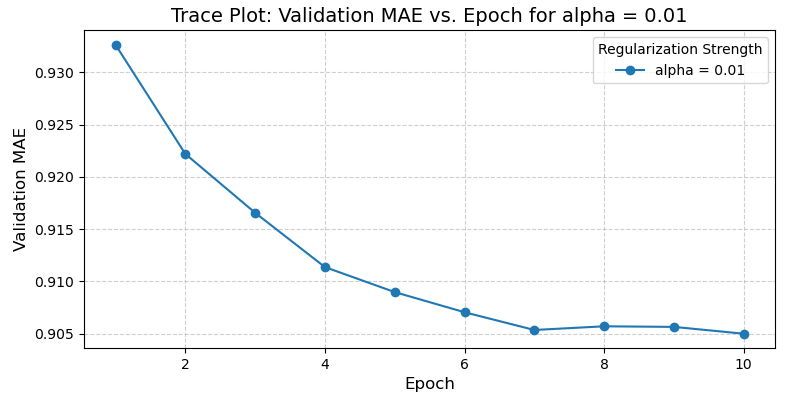

<IPython.core.display.Javascript object>


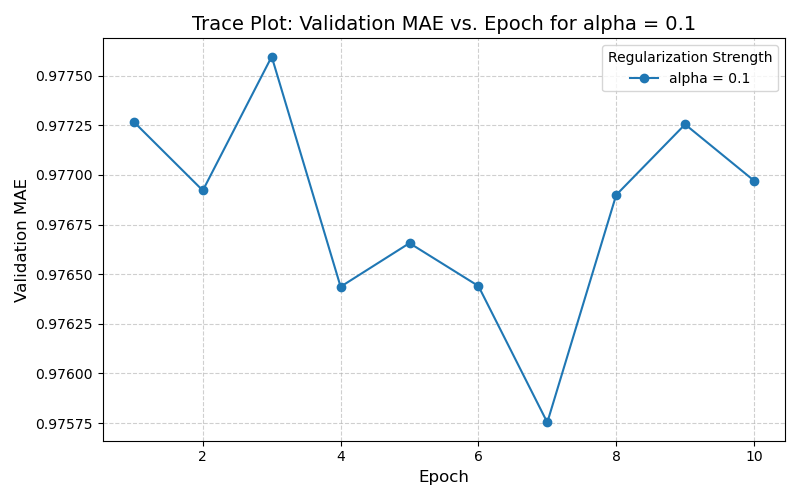

<IPython.core.display.Javascript object>


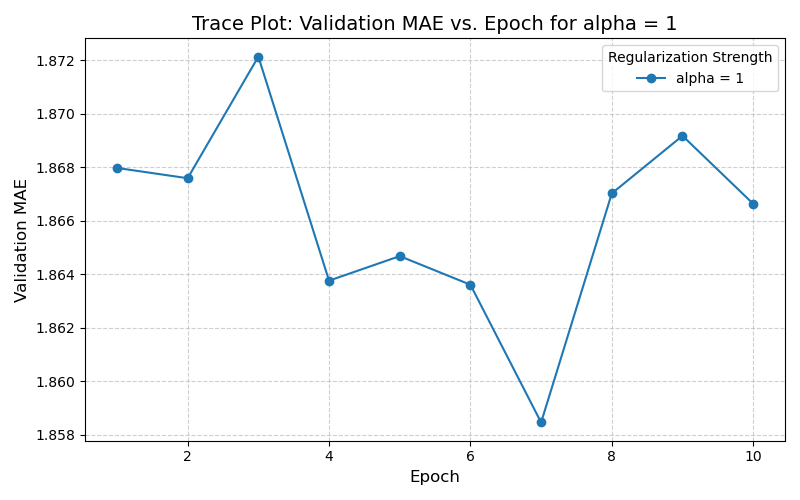

<IPython.core.display.Javascript object>


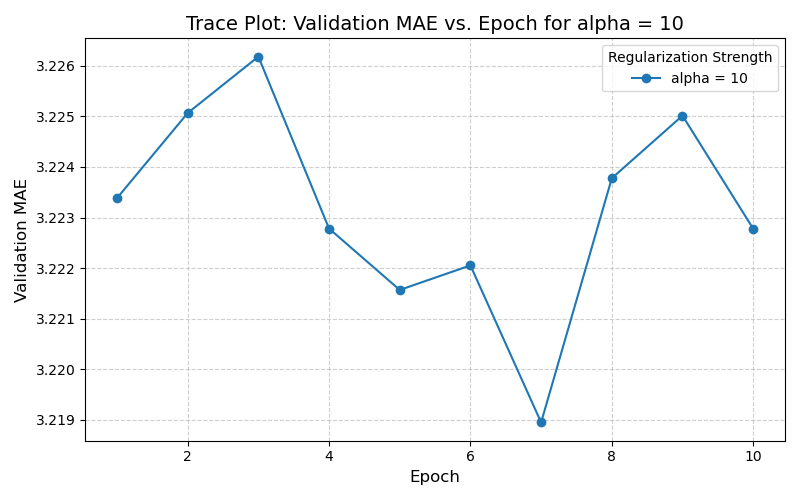

<IPython.core.display.Javascript object>


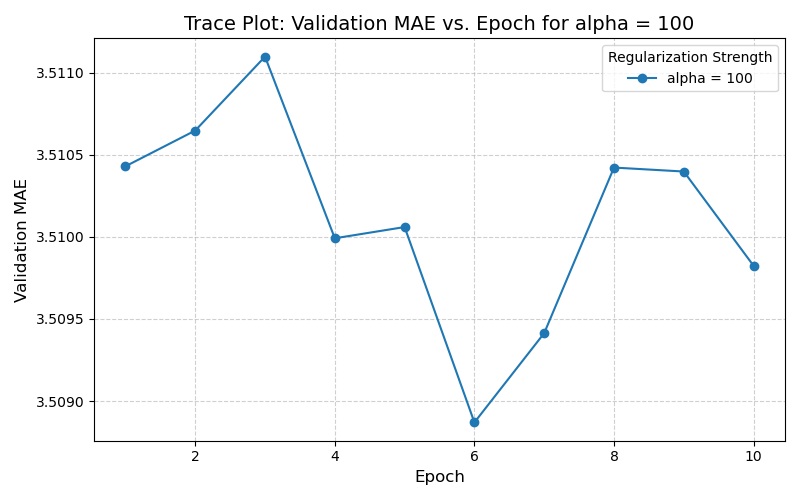

In [29]:
import matplotlib.pyplot as plt

# Organize data by alpha
results_by_alpha = {}
for result in all_results:
    alpha = result["alpha"]
    if alpha not in results_by_alpha:
        results_by_alpha[alpha] = {"epochs": [], "mae_valid": []}
    results_by_alpha[alpha]["epochs"].append(result["epoch"] + 1)  # Convert to 1-based epoch
    results_by_alpha[alpha]["mae_valid"].append(result["mae_valid"])

# Debugging: Check grouped data
print("Data grouped by alpha:")
for alpha, values in results_by_alpha.items():
    print(f"alpha = {alpha}, Number of epochs: {len(values['epochs'])}")

# Create separate plots for each alpha
for alpha, values in results_by_alpha.items():
    plt.figure(figsize=(8, 5))
    plt.plot(values["epochs"], values["mae_valid"], marker='o', label=f"alpha = {alpha}")

    # Customize plot
    plt.title(f"Trace Plot: Validation MAE vs. Epoch for alpha = {alpha}", fontsize=14)
    plt.xlabel("Epoch", fontsize=12)
    plt.ylabel("Validation MAE", fontsize=12)
    plt.legend(title="Regularization Strength", fontsize=10)
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()

    # Show plot
    plt.show()
